In [1]:
import numpy as np
import torch
from torch import nn, optim
import pickle
import googlenet_1D
from googlenet_1D import googlenet_1D
from torch.utils.data import DataLoader, Dataset
from matplotlib import pyplot as plt
import torch.nn.functional as F

In [2]:
X_class_train_s=torch.load('train_classifier.pt')
y_train=torch.load('label_train_classifier.pt')
X_class_test_s=torch.load('test_classifier.pt')
y_tet=torch.load('label_test_classifier.pt')

In [3]:
 filename='class_gnet_s'
 model=pickle.load(open(filename,'rb'))

In [4]:
from pytorch_grad_cam import  GradCAMPlusPlus
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

In [5]:
def get_features(name):
    def hook(model, input, output):
        features[name] = output.detach()
    return hook
model.conv3.register_forward_hook(get_features('feats'))


In [6]:
def get_gradient(name):
    def hook(model, input, output):
        features1[name] = output
    return hook
model.conv3.register_full_backward_hook(get_gradient('fits'))

In [7]:
FEATS = []

# placeholder for batch features
#input_tensor=torch.tensor(X_class_test_s[0:64,:],dtype=torch.float32)
features = {}
features1={}
def grad_cam(data):
    
    input_tensor=torch.tensor(data,dtype=torch.float32)
    preds=model(input_tensor)
    out=features['feats']
    pred_index=torch.argmax(preds[0])
    class_channel =preds[:,pred_index]
    preds[0,9].backward()
    gradout=features1['fits']
    gradout=torch.cat(gradout,dim=1)
    pooled_grads=torch.mean(gradout,dim=[0,2])
    target_layers_output=out[0]
    for i in range(32):
        target_layers_output[i,:]*=pooled_grads[i]
    heatmap=target_layers_output
    heatmap=torch.mean(heatmap,dim=1)
    heatmap=heatmap.detach().numpy()
    heatmap=np.expand_dims(heatmap,0)
    return heatmap



In [8]:
y_tet=torch.argmax(y_tet,dim=1)
label_test=y_tet.detach().cpu().numpy()

True label = [9]


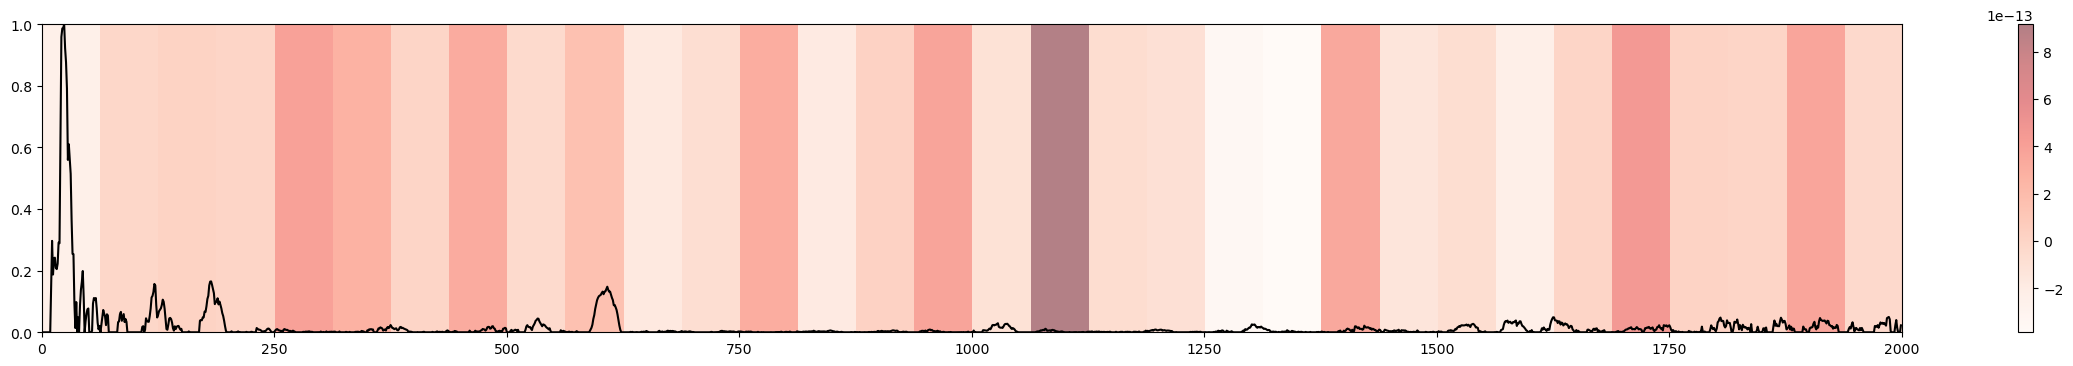

True label = [1]


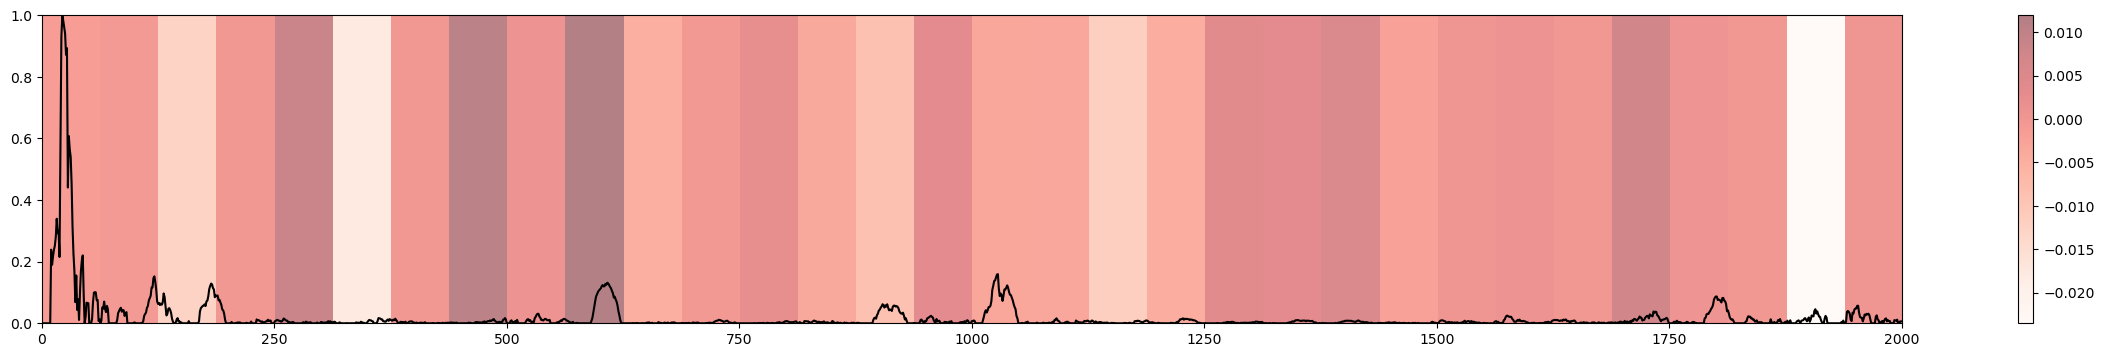

True label = [8]


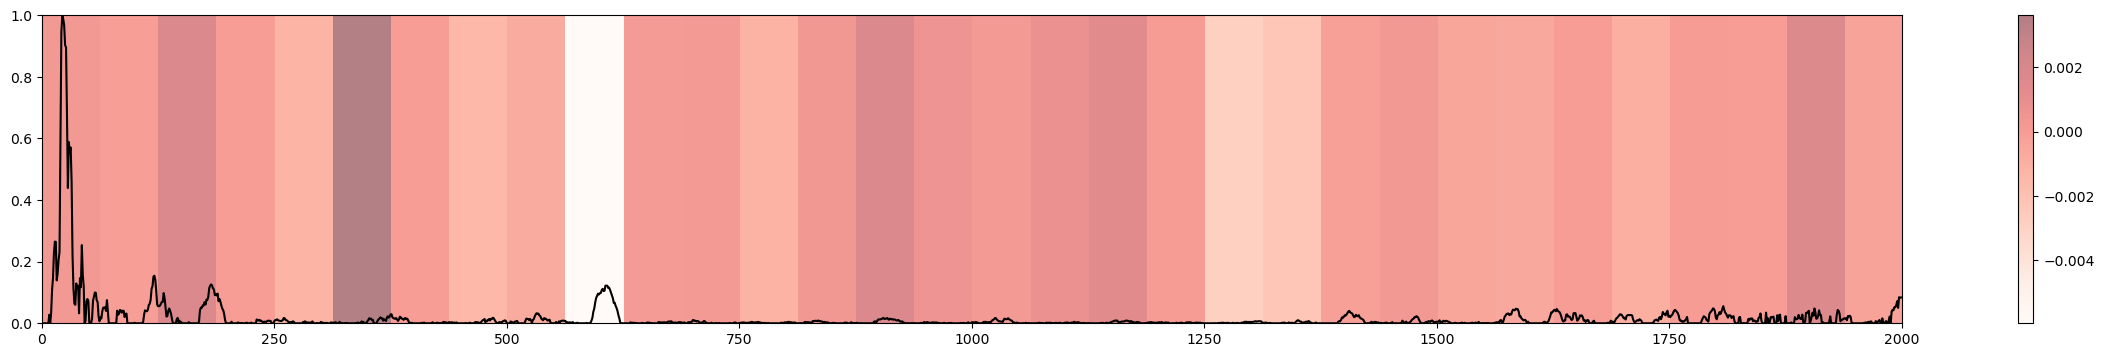

True label = [12]


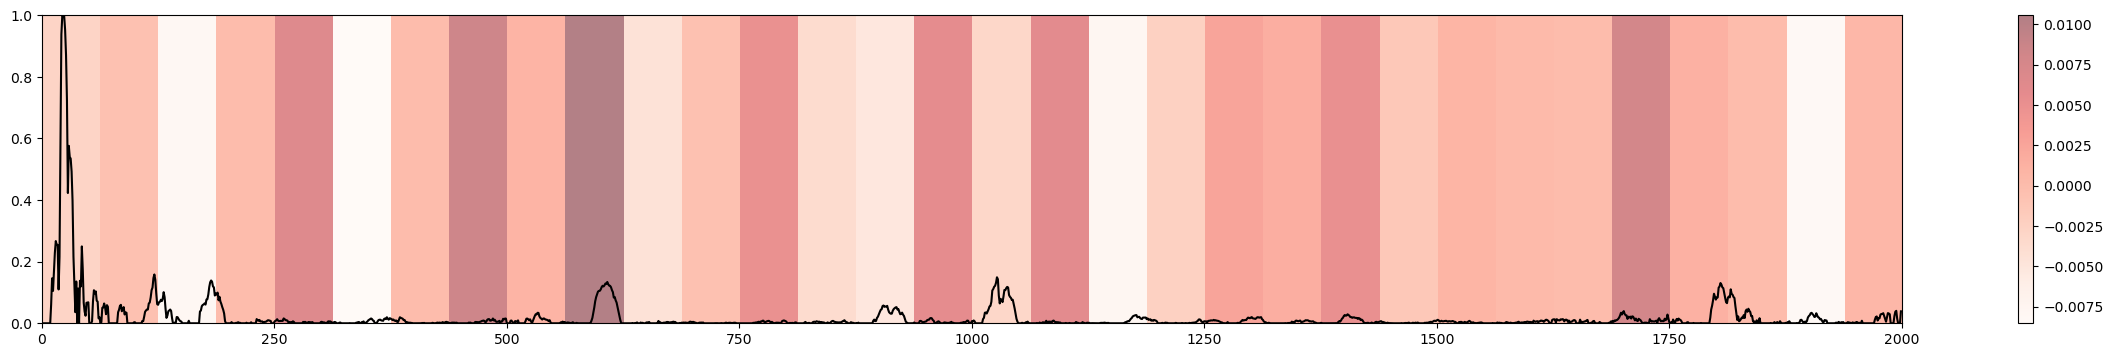

True label = [11]


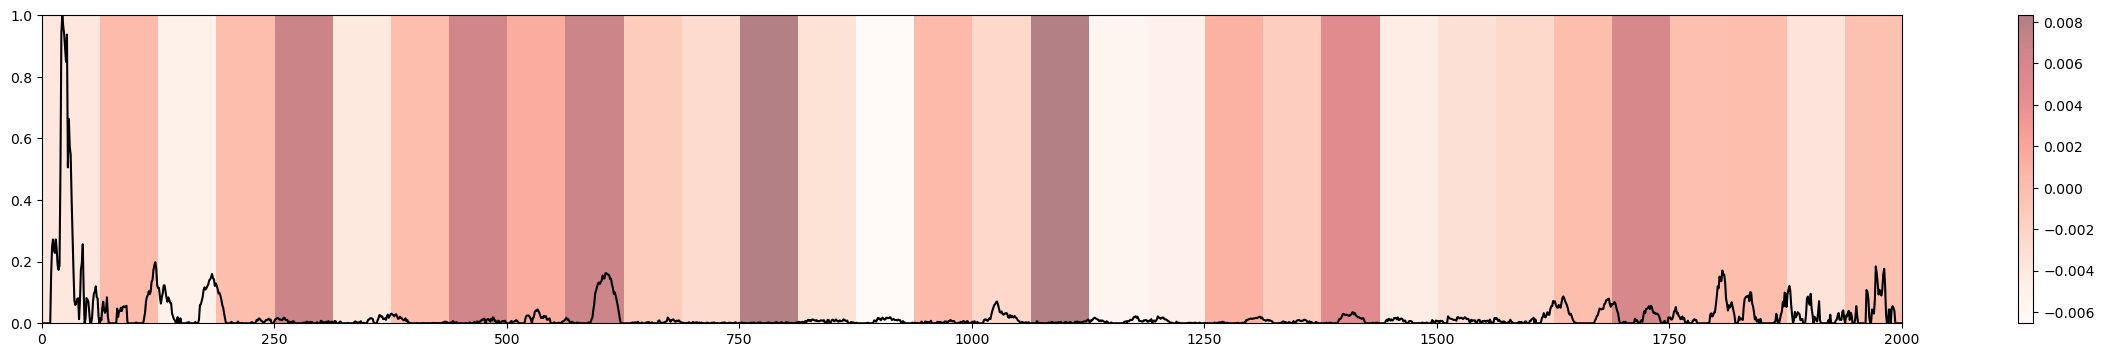

True label = [0]


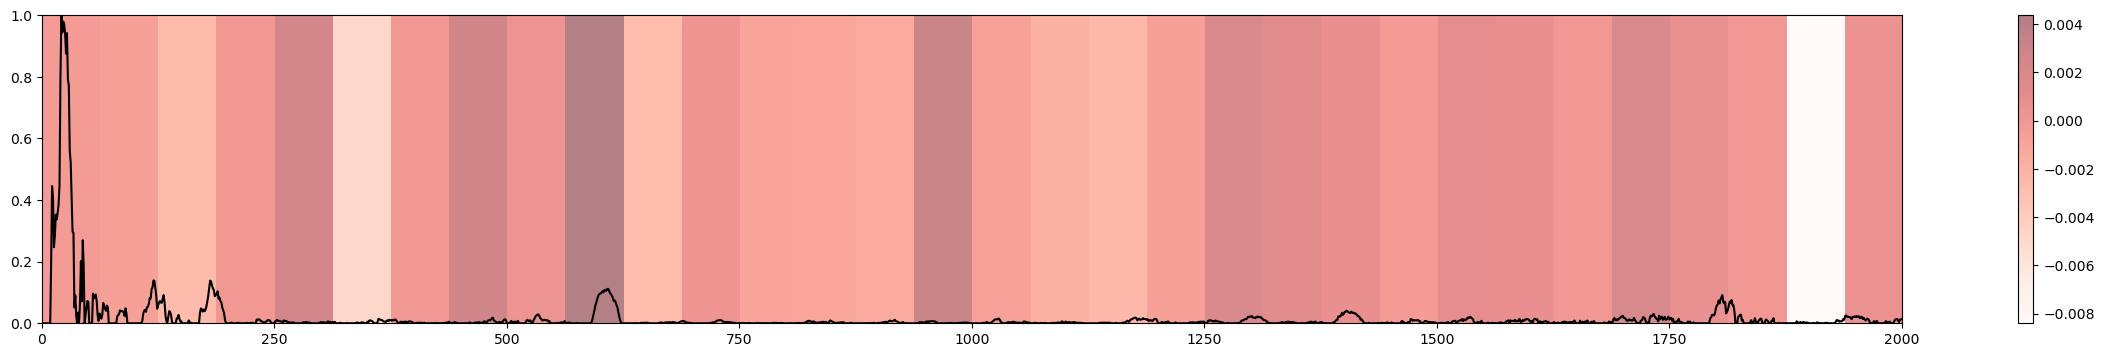

True label = [10]


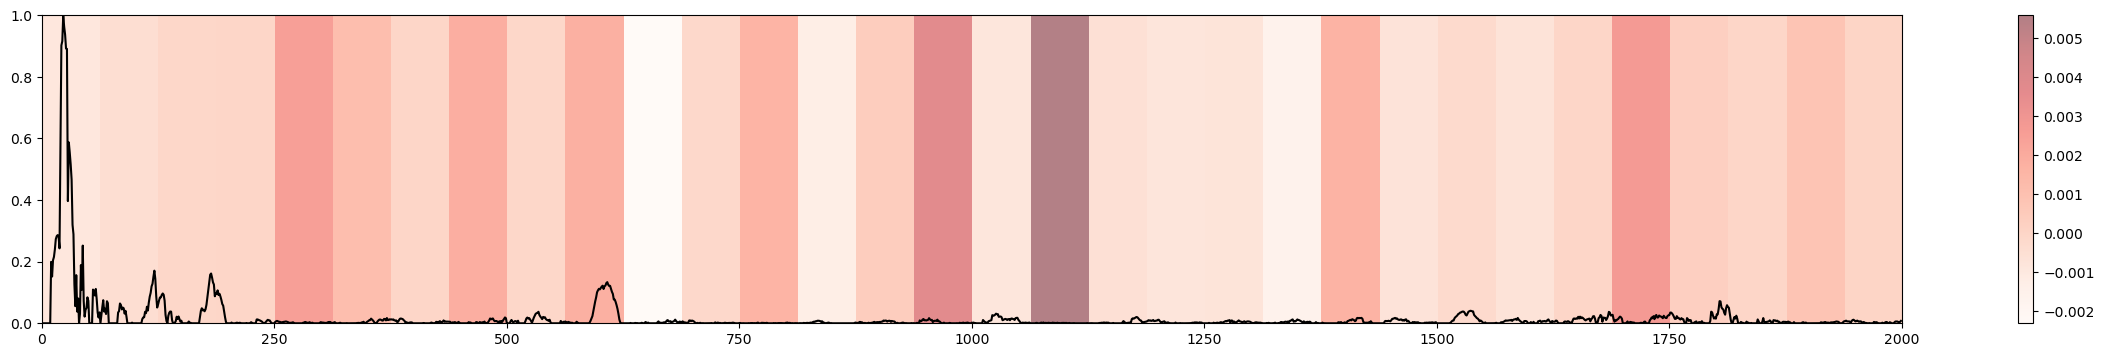

True label = [14]


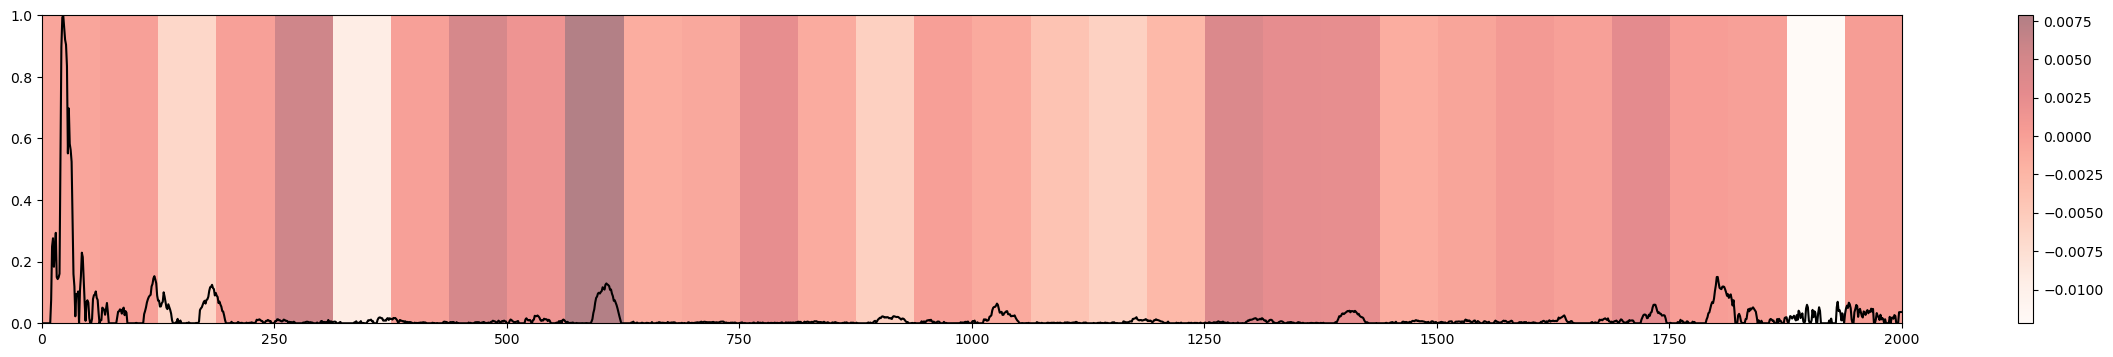

True label = [10]


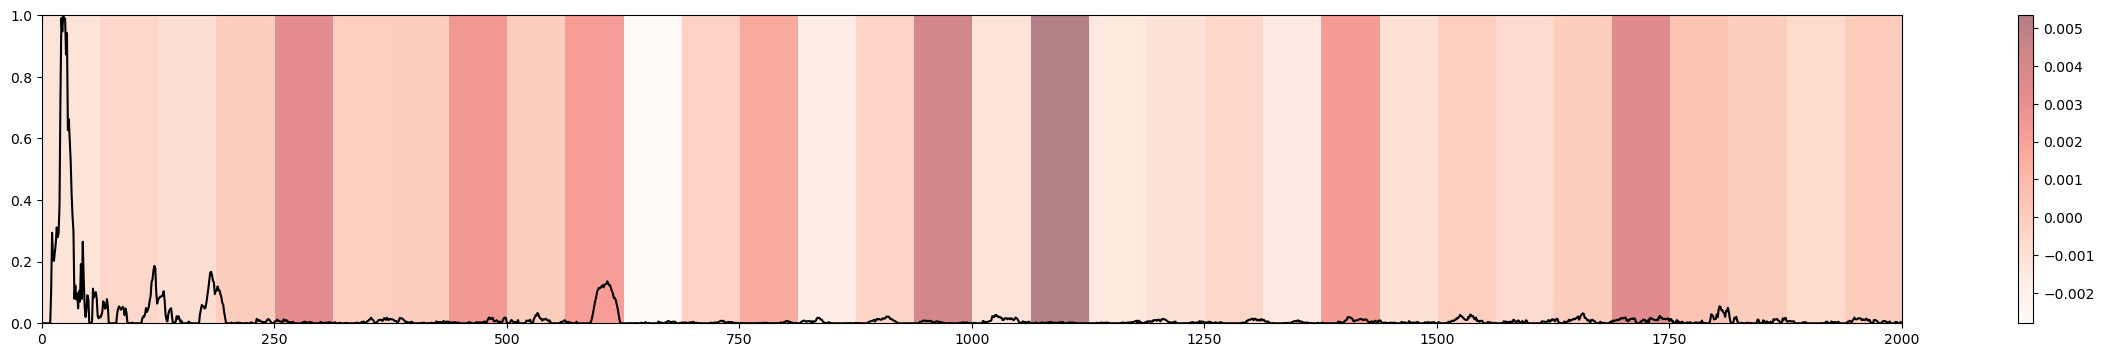

True label = [5]


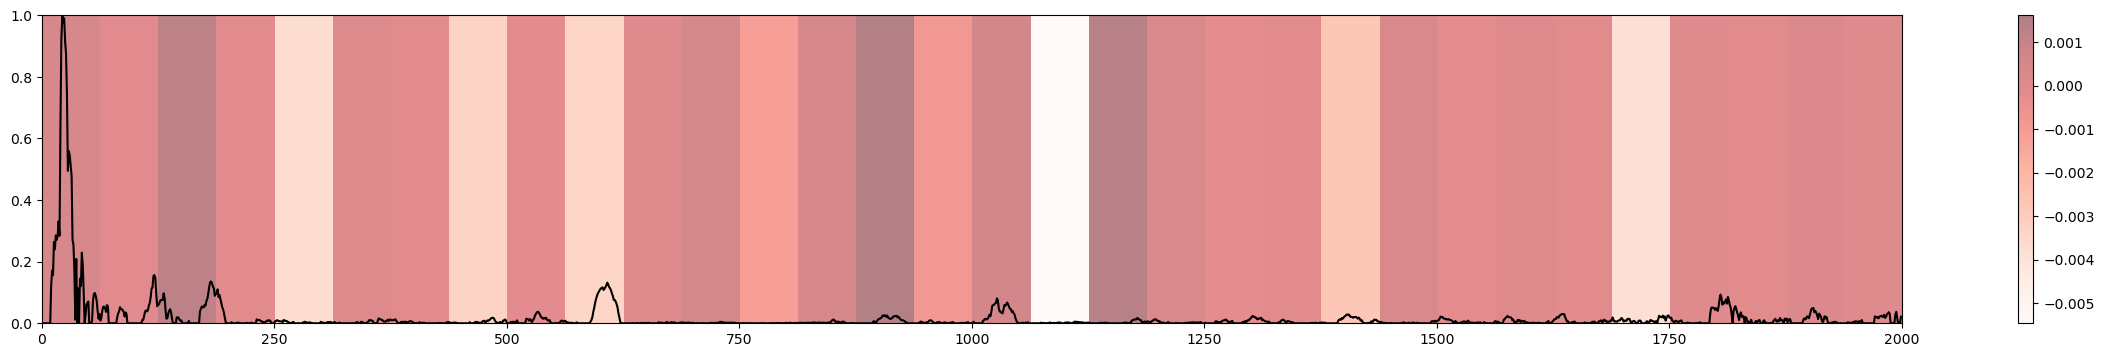

True label = [9]


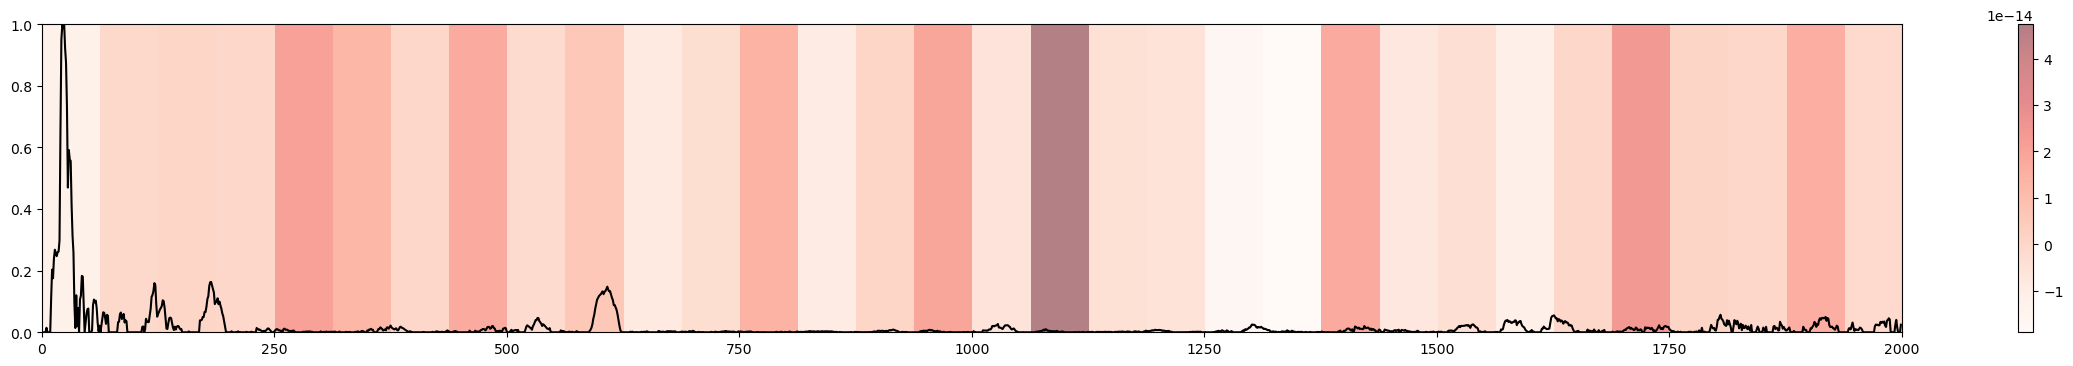

True label = [3]


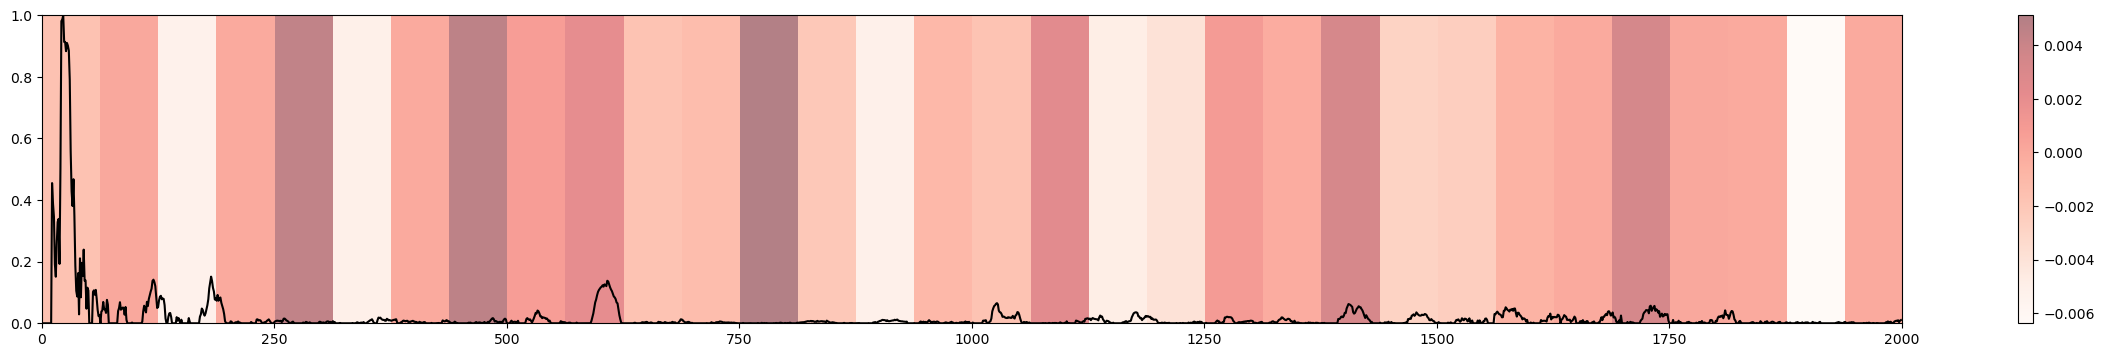

True label = [5]


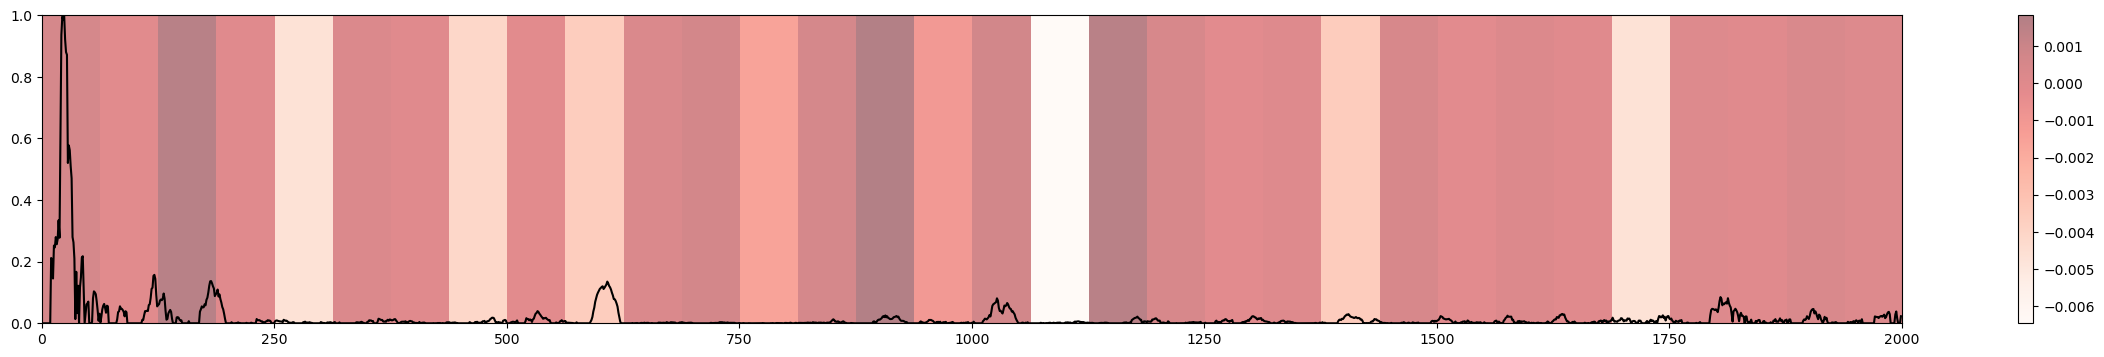

True label = [15]


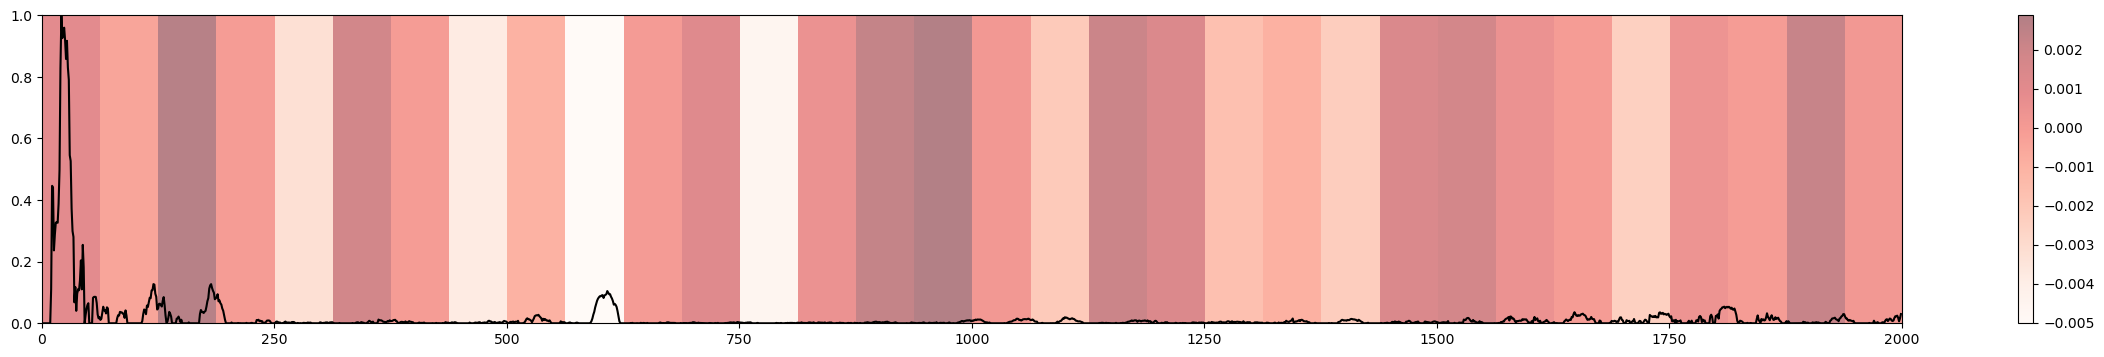

True label = [10]


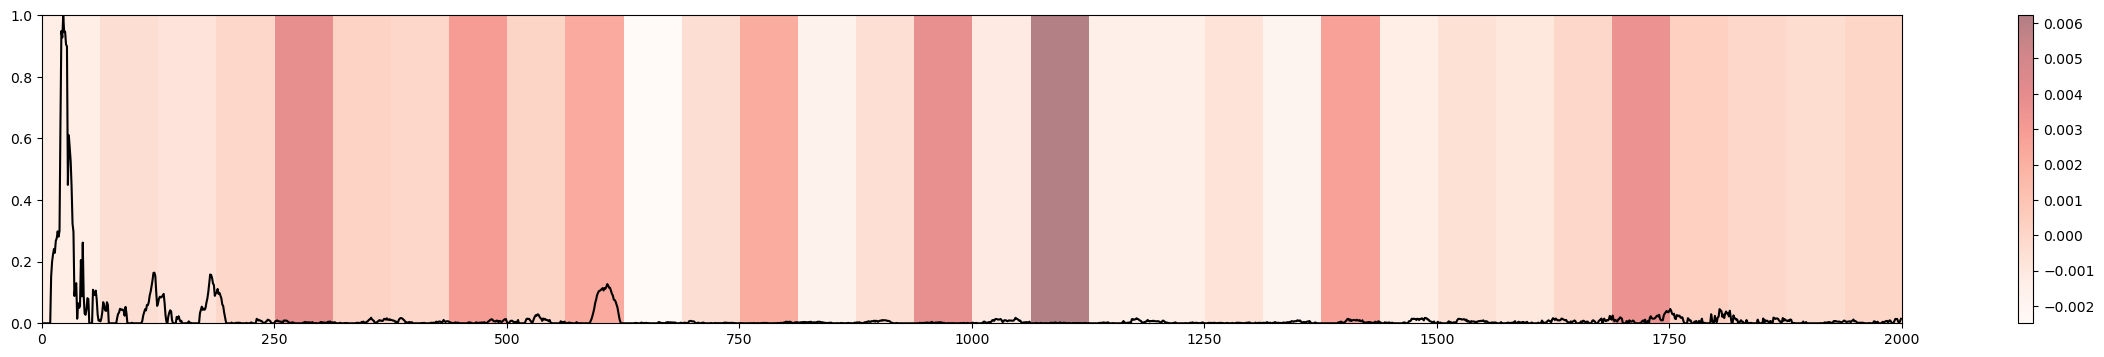

True label = [10]


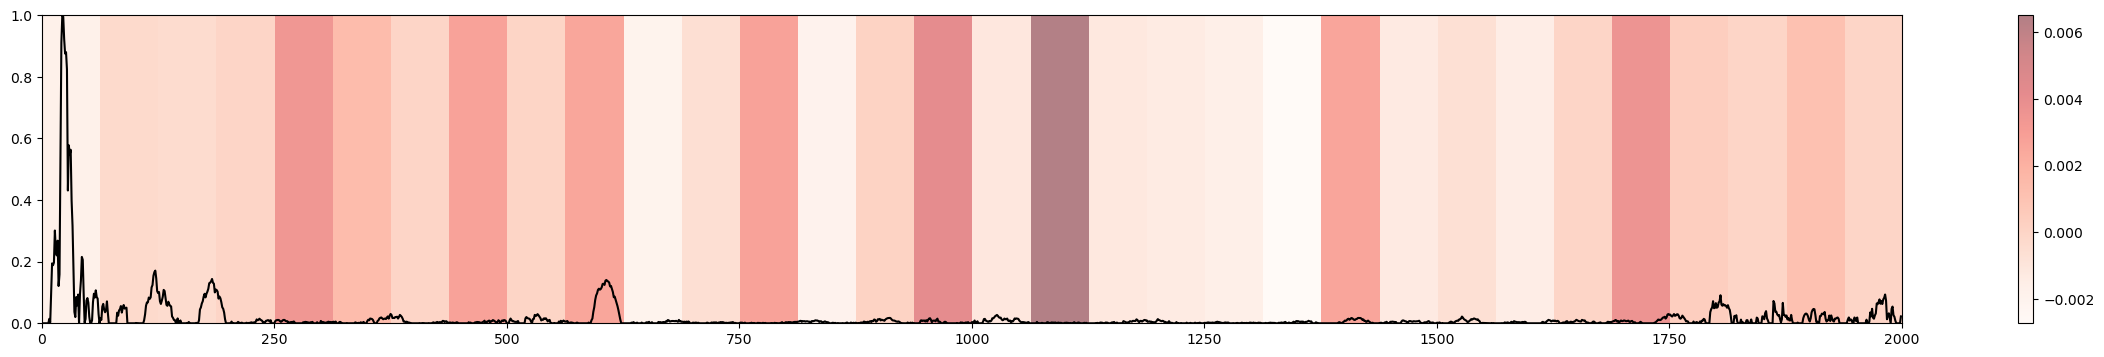

True label = [1]


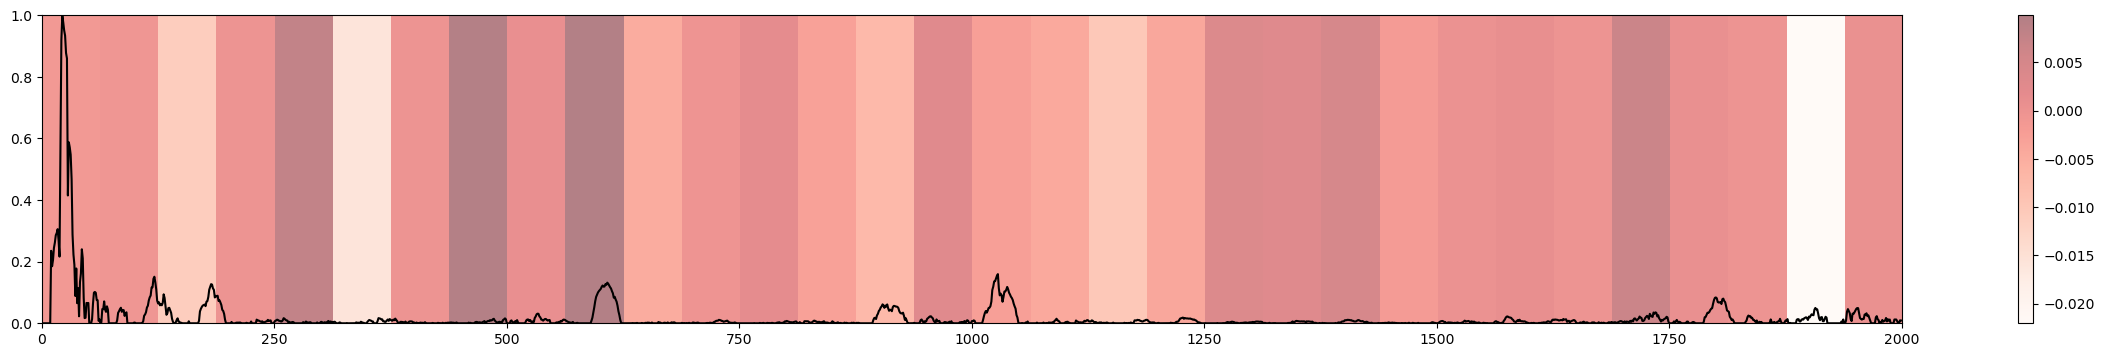

True label = [10]


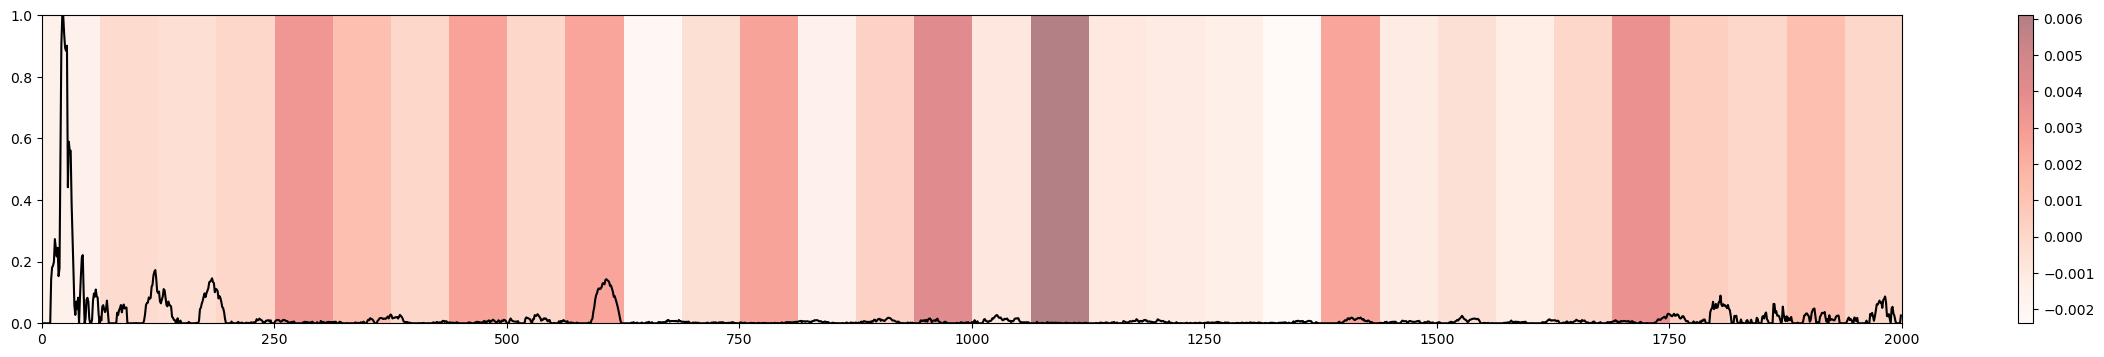

True label = [0]


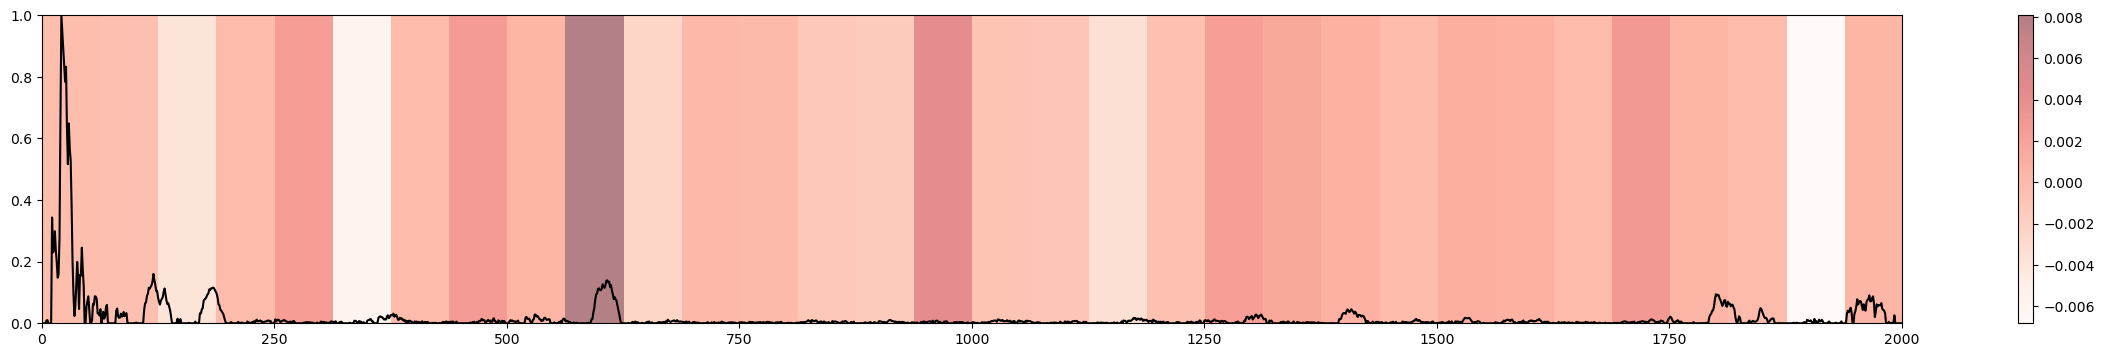

True label = [7]


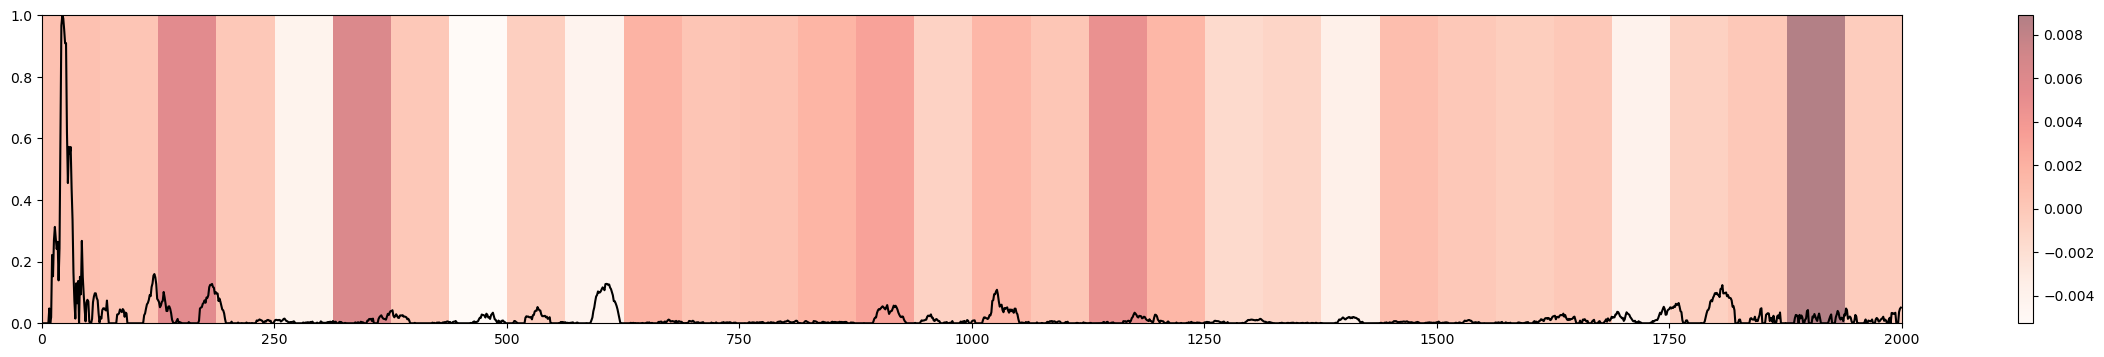

True label = [10]


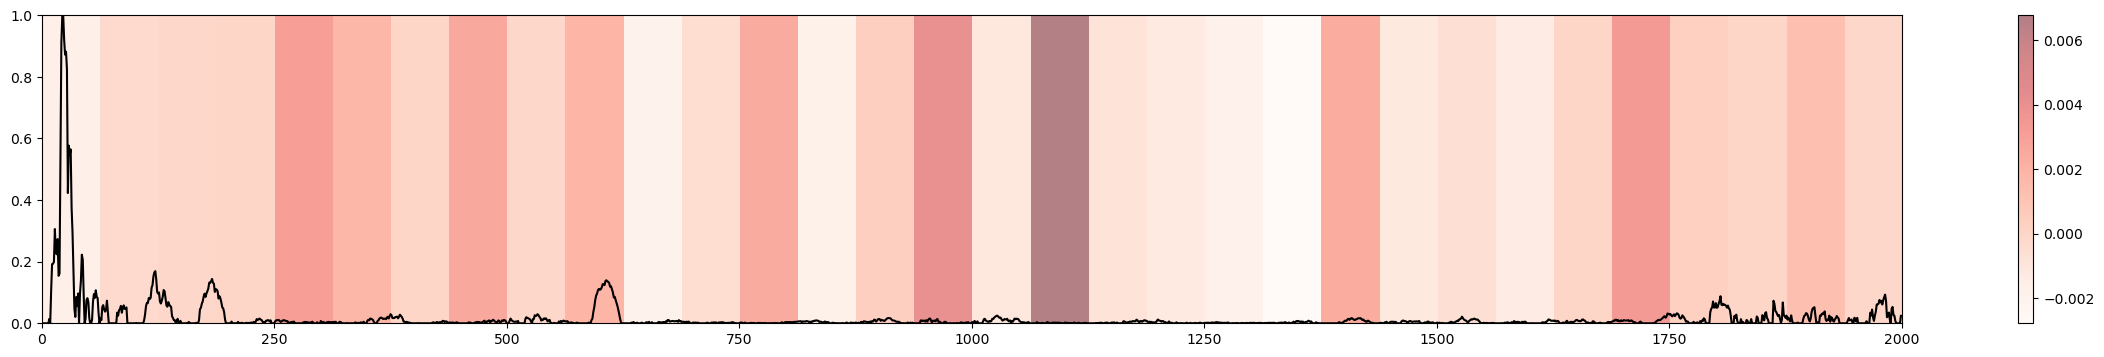

True label = [9]


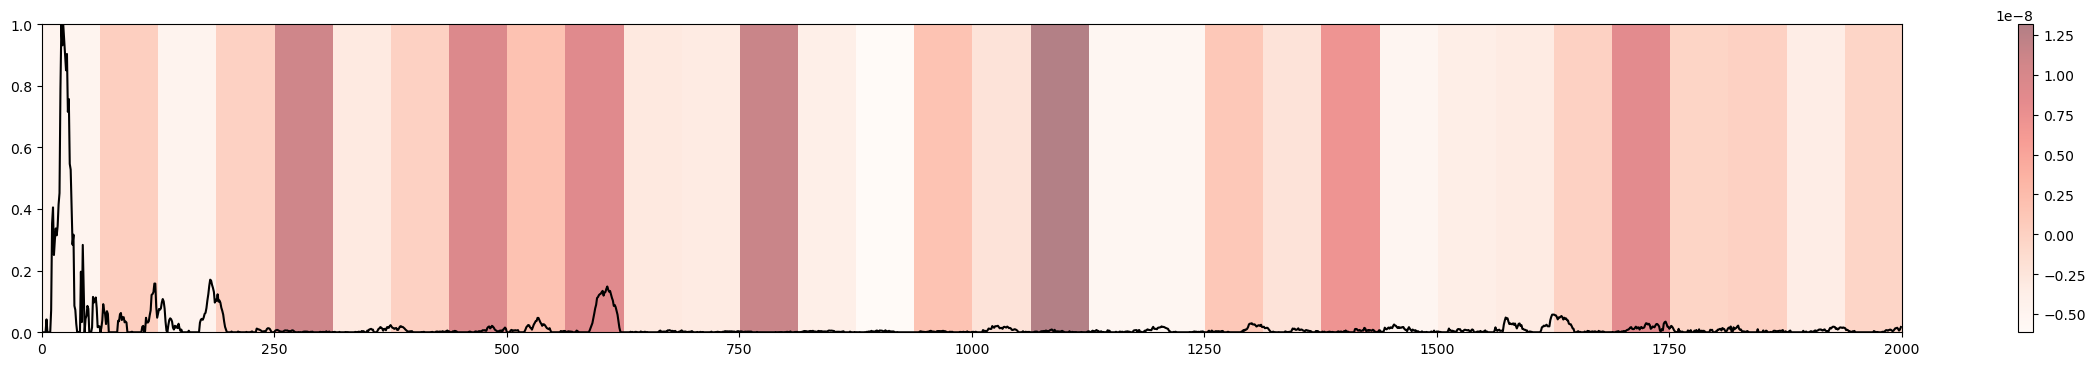

True label = [6]


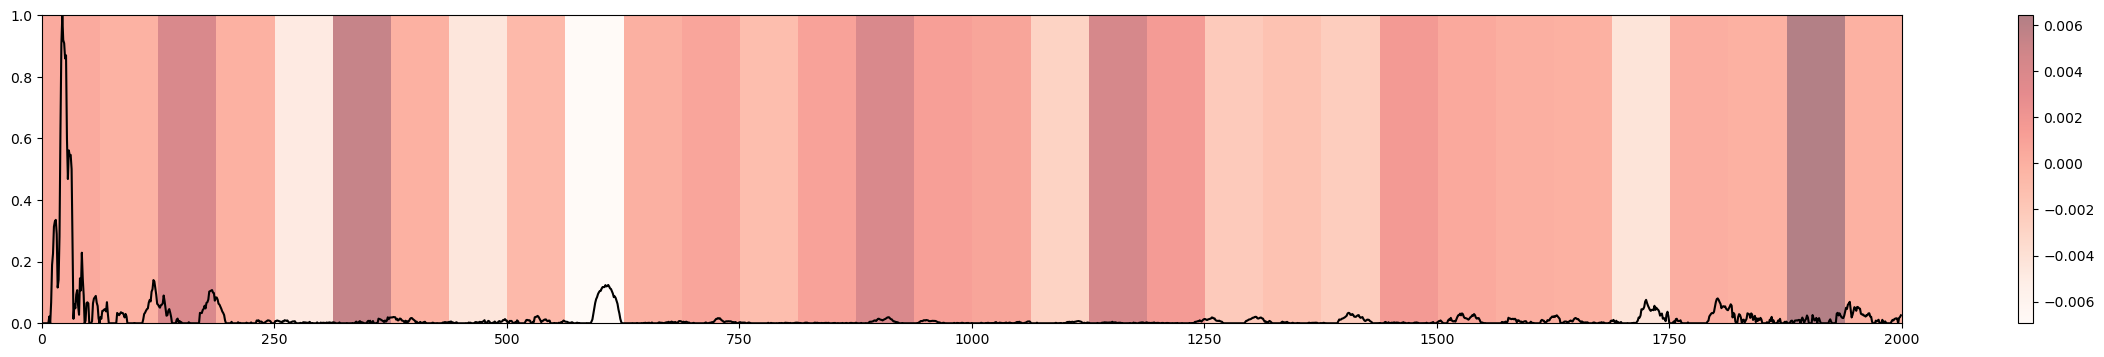

True label = [6]


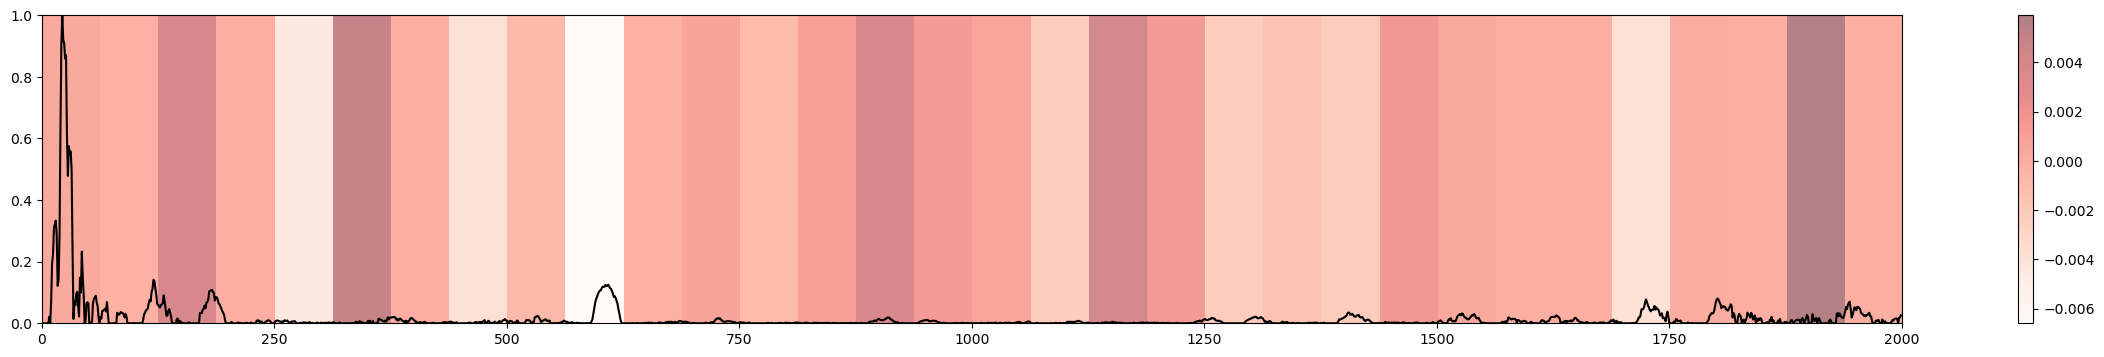

True label = [10]


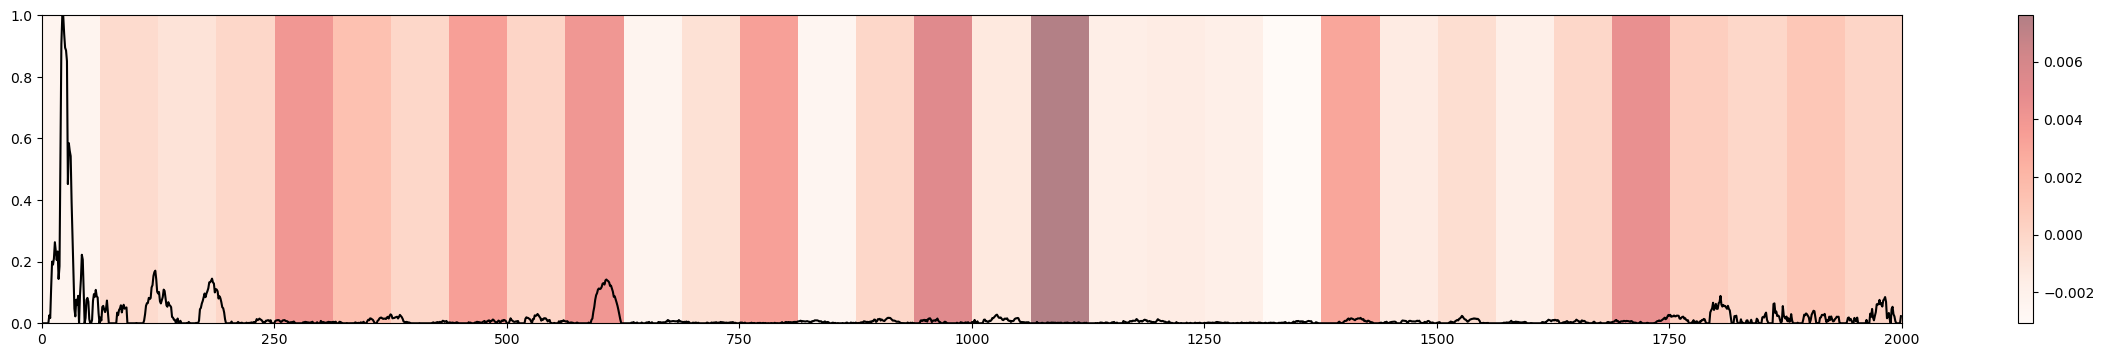

True label = [3]


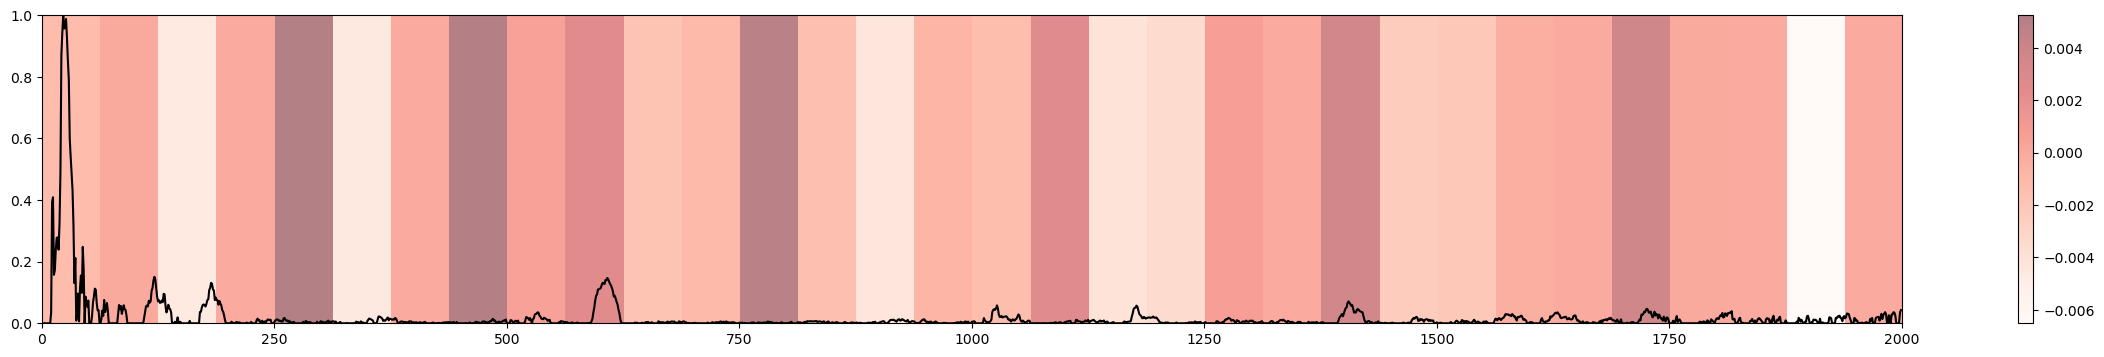

True label = [3]


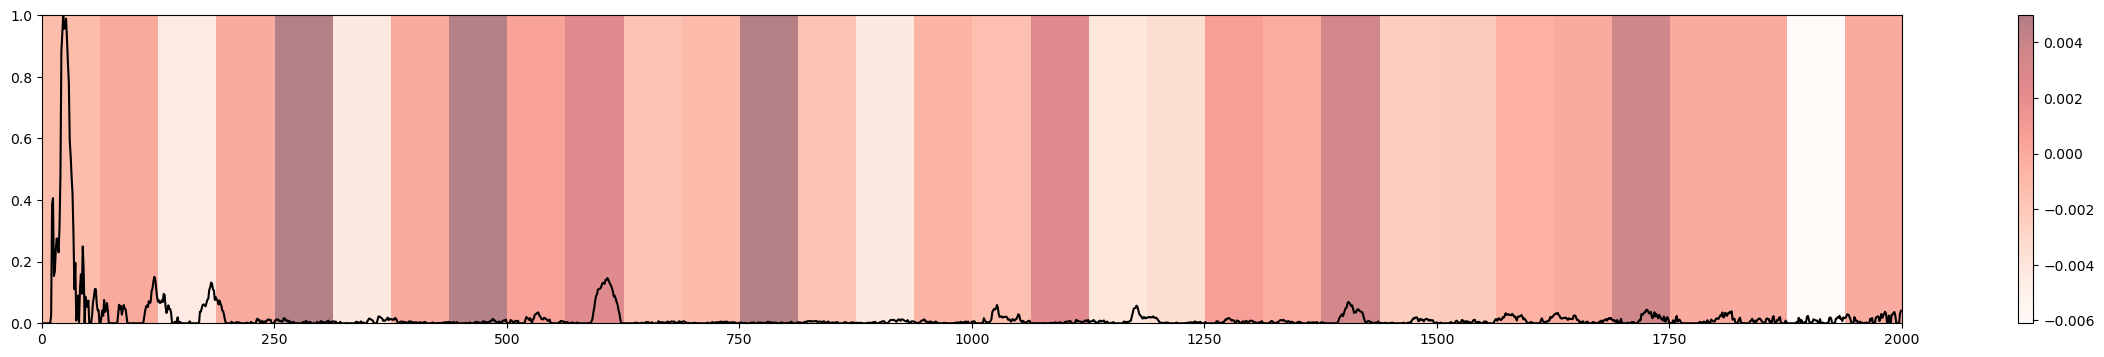

True label = [5]


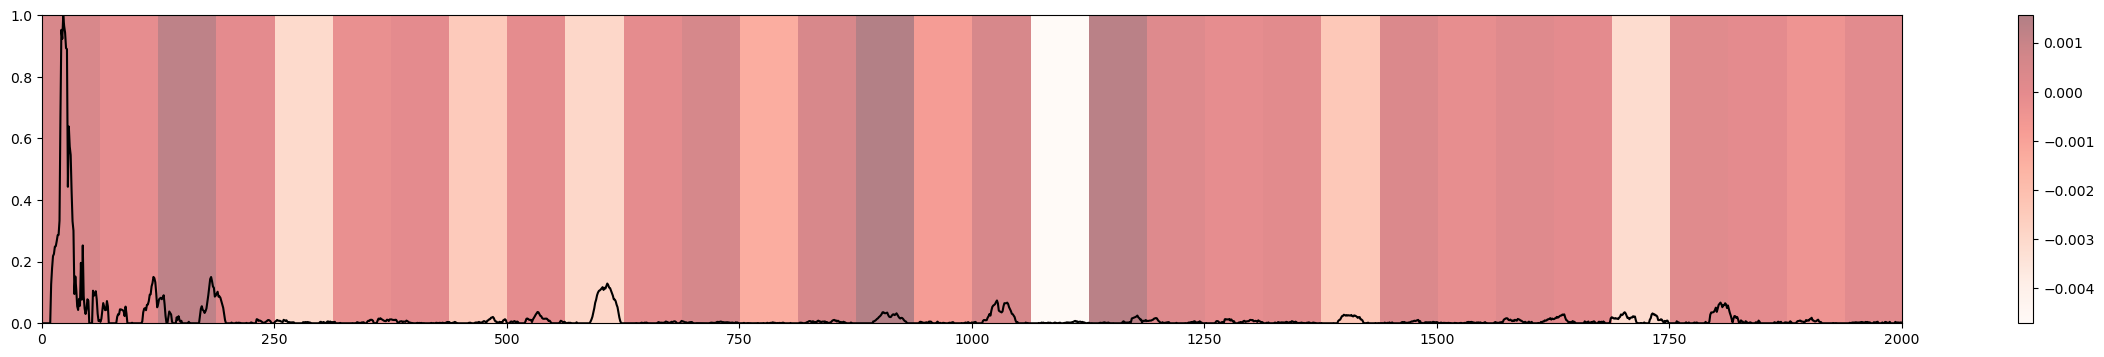

True label = [5]


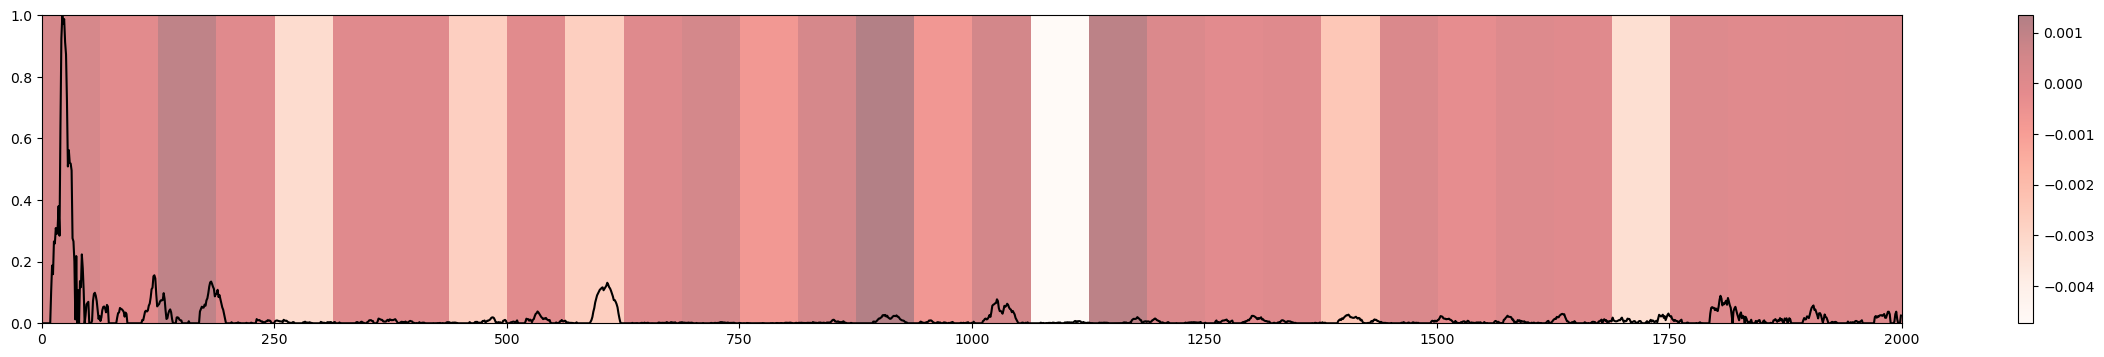

True label = [14]


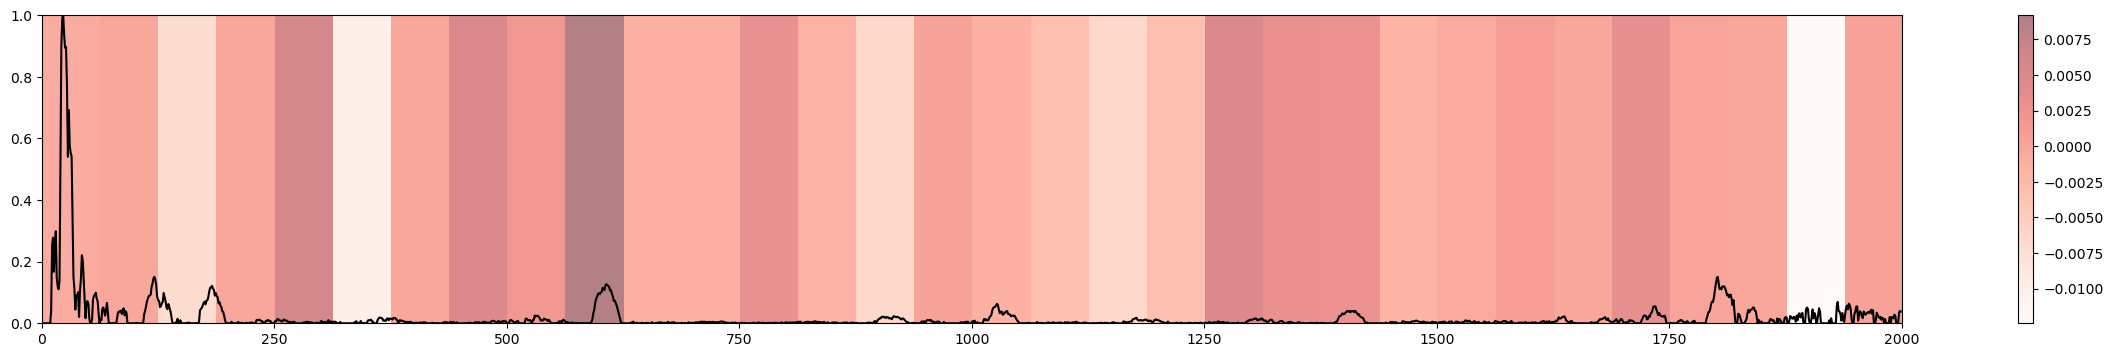

True label = [12]


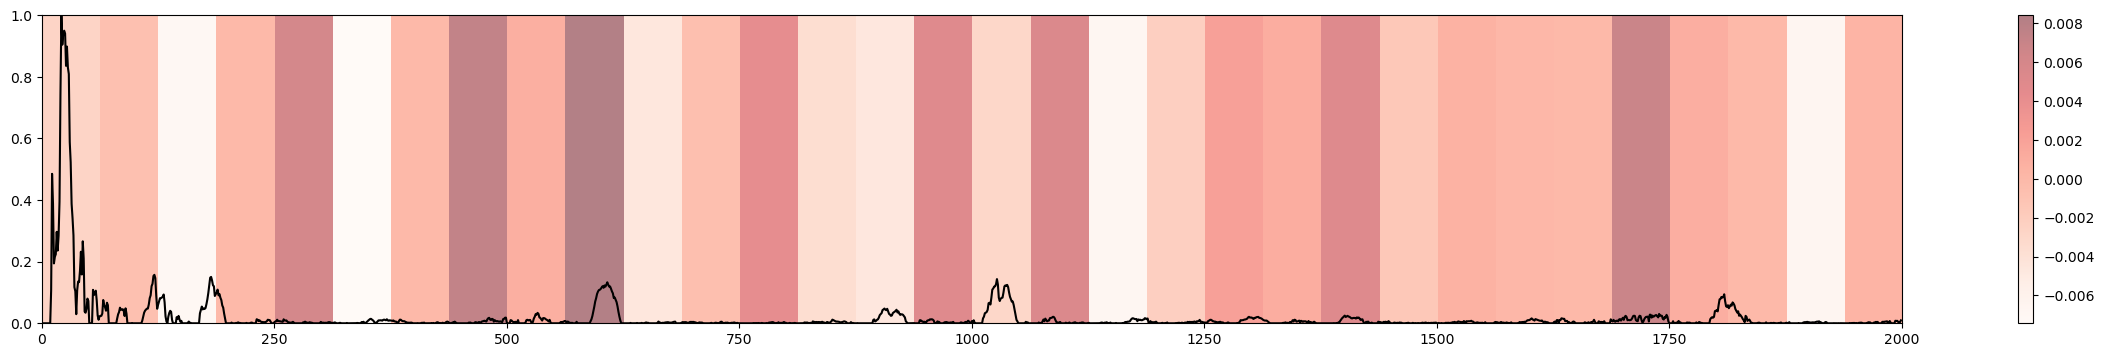

True label = [12]


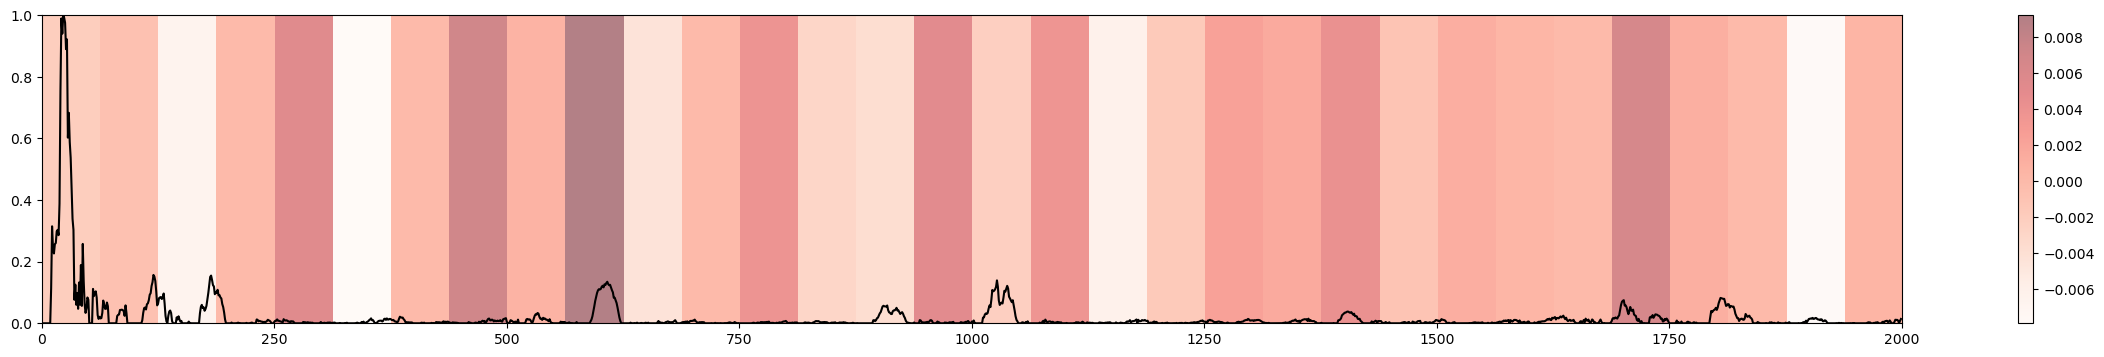

True label = [0]


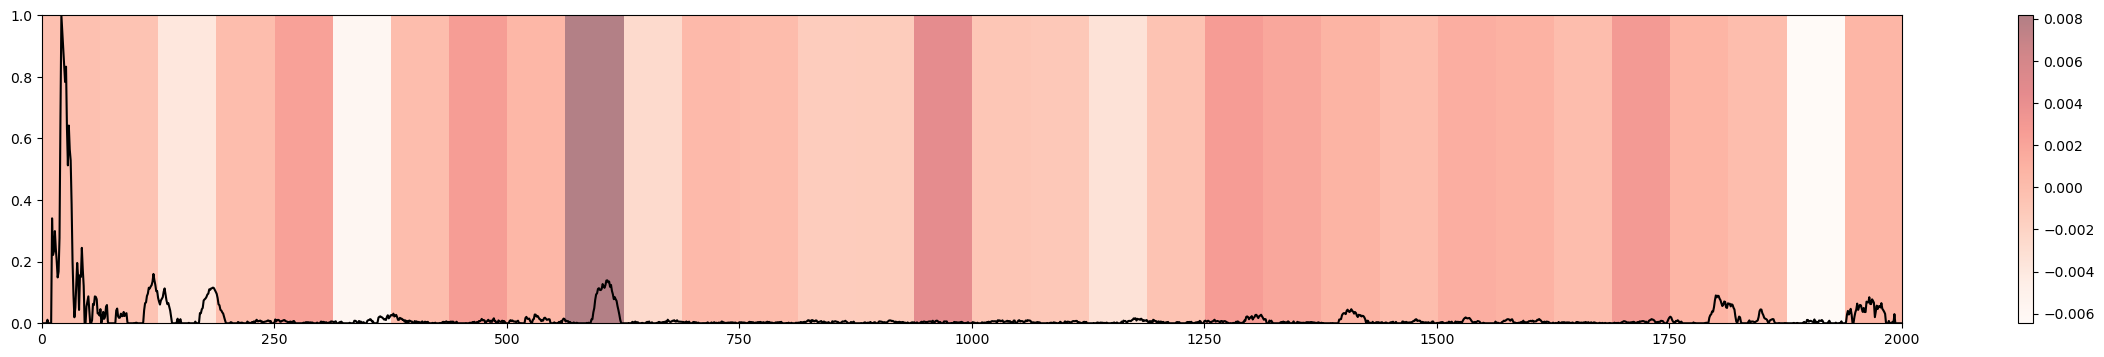

True label = [7]


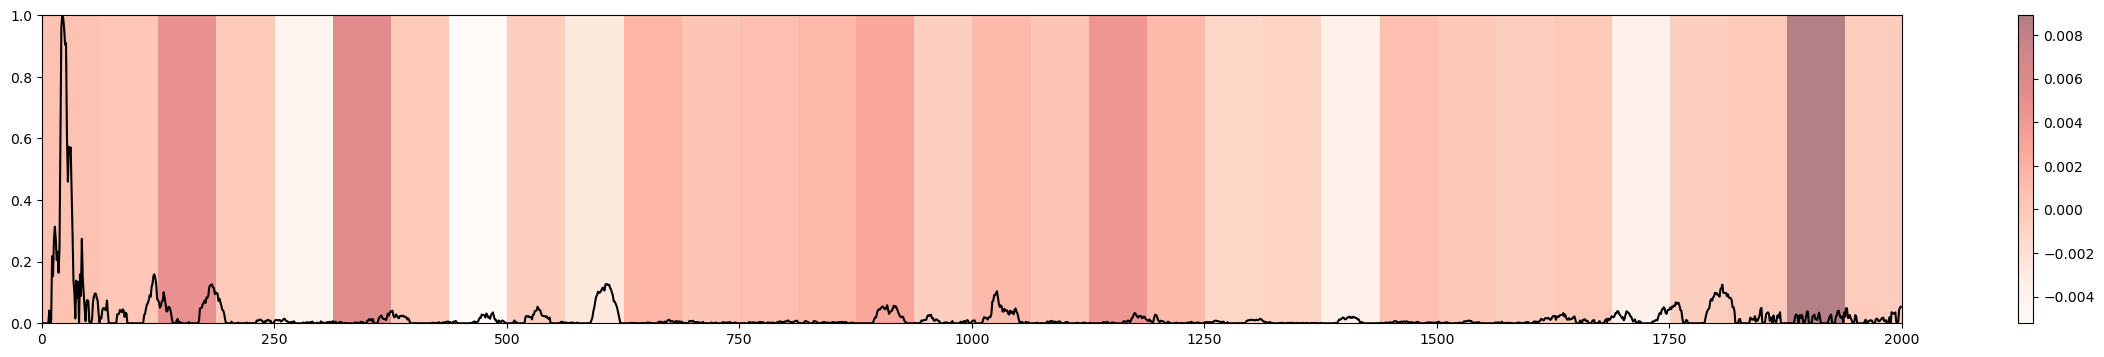

True label = [12]


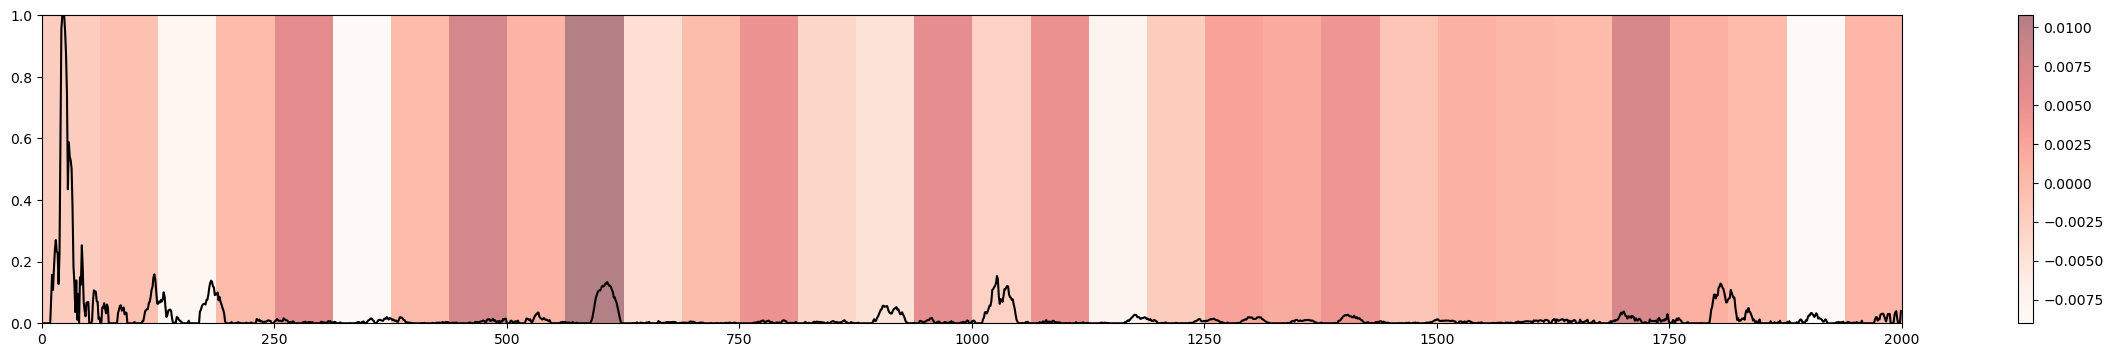

True label = [2]


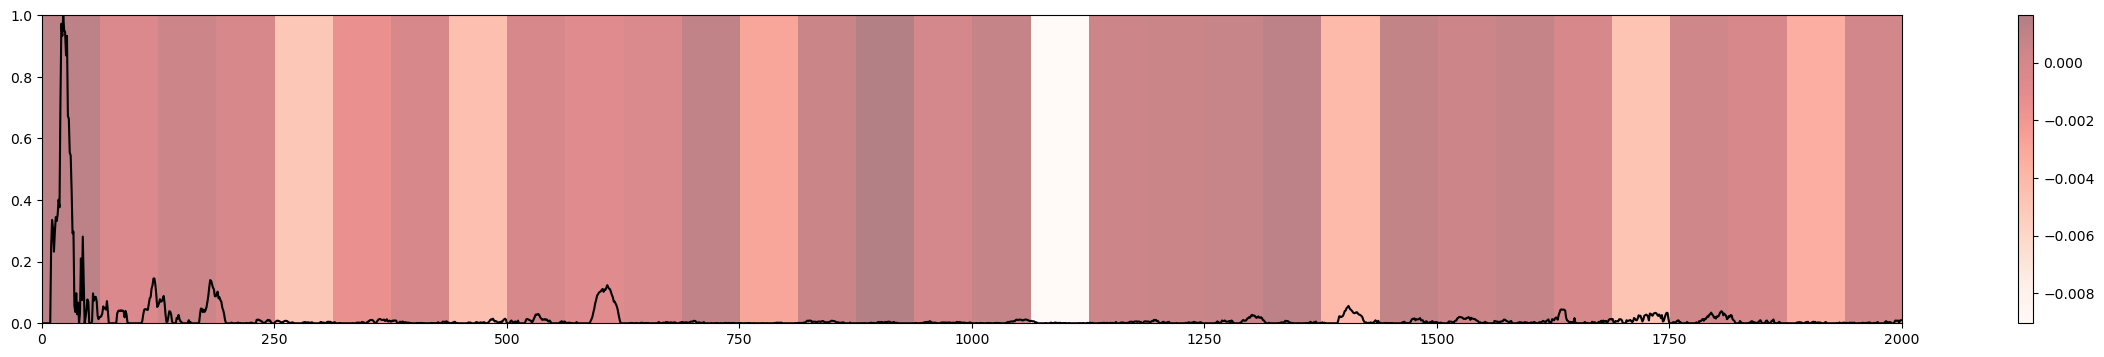

True label = [14]


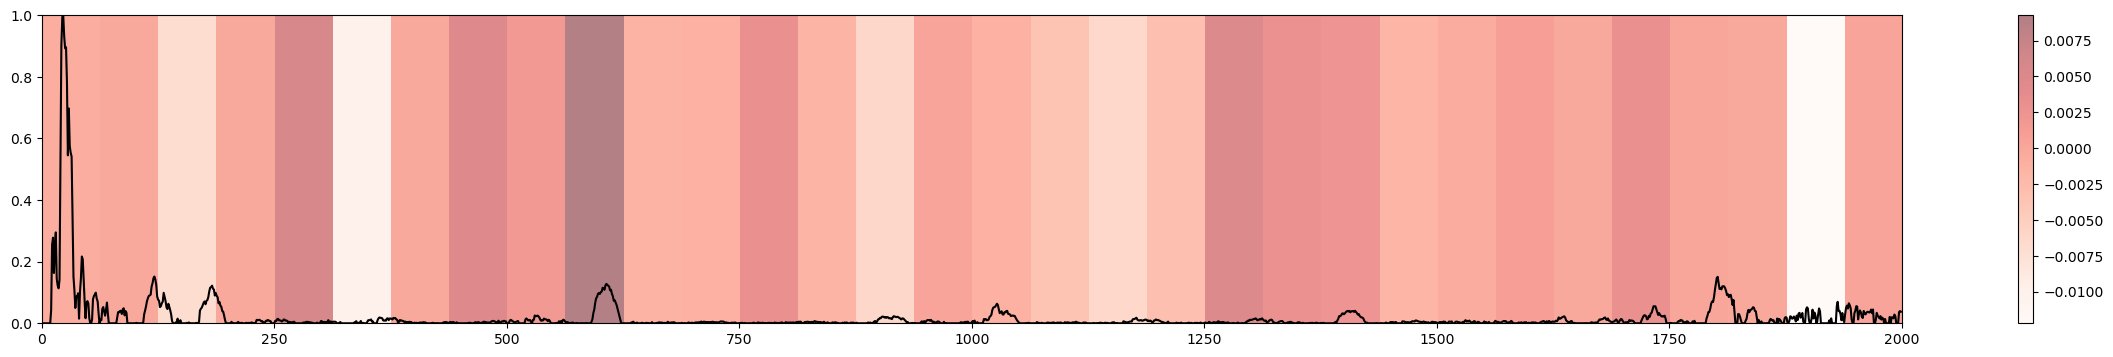

True label = [12]


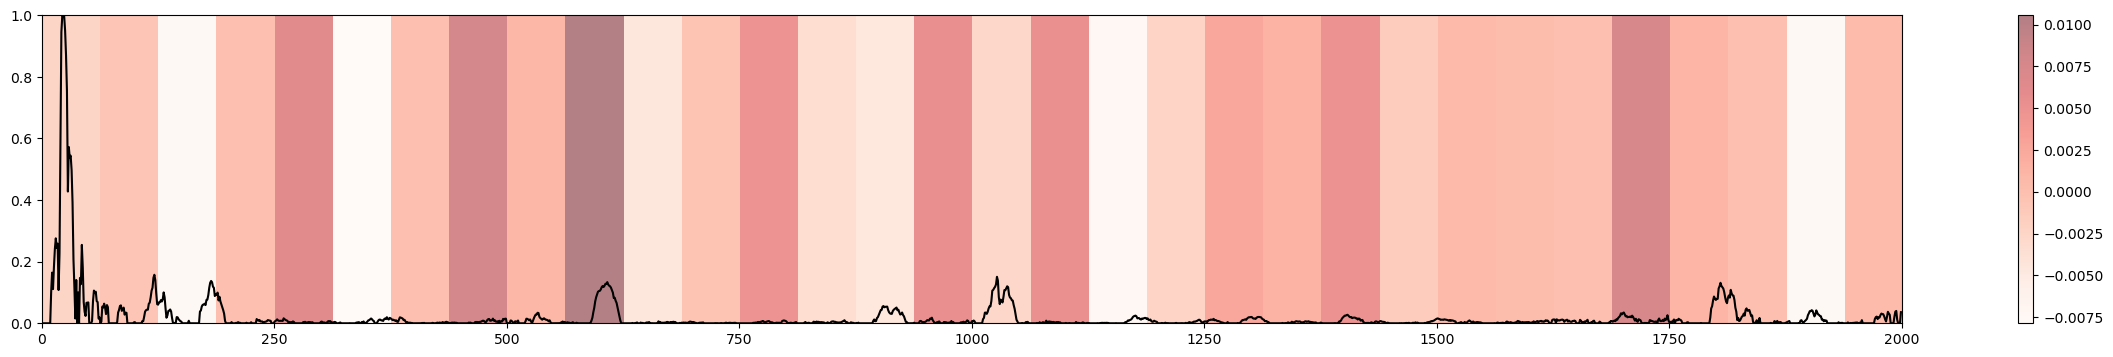

True label = [9]


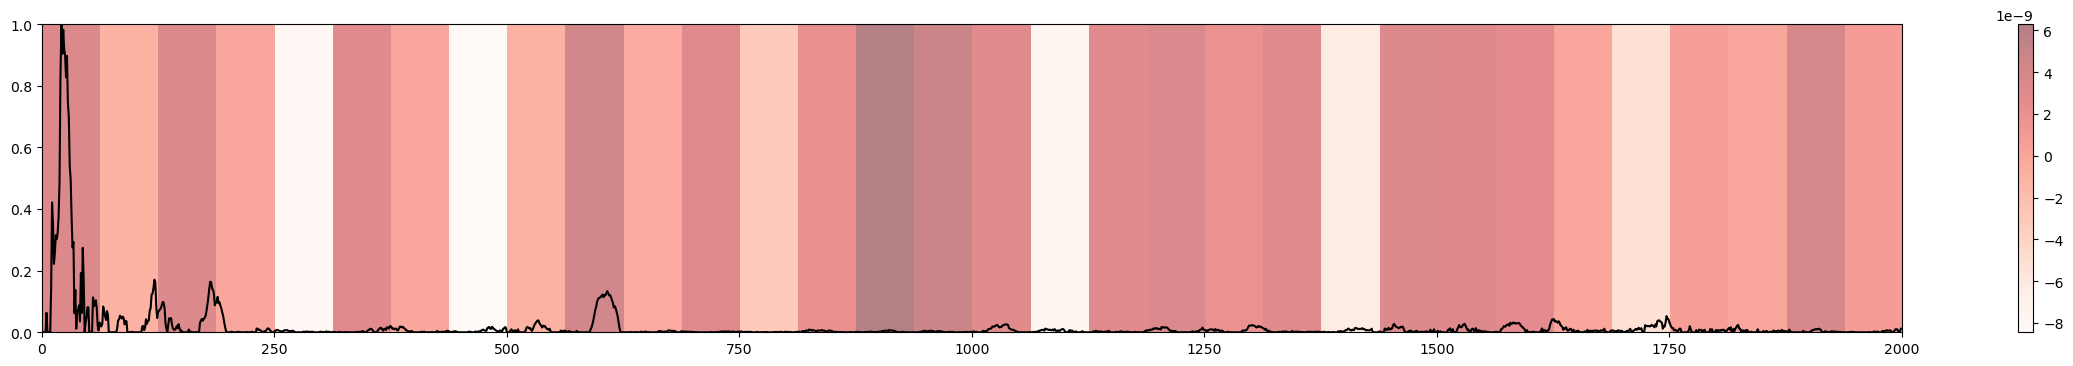

True label = [7]


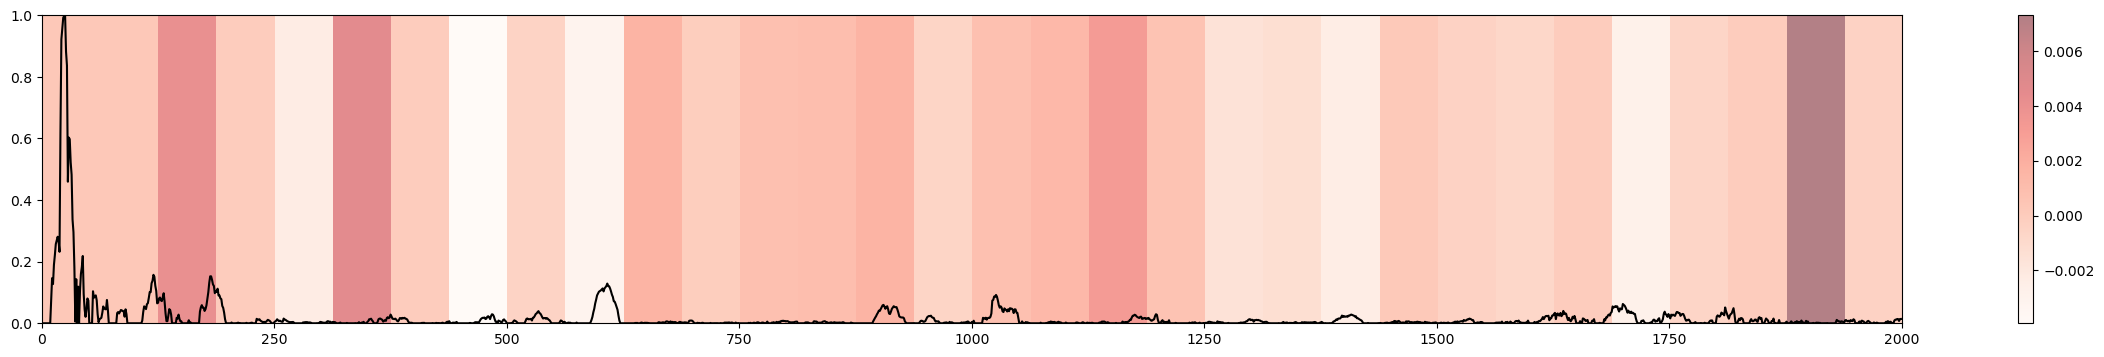

True label = [8]


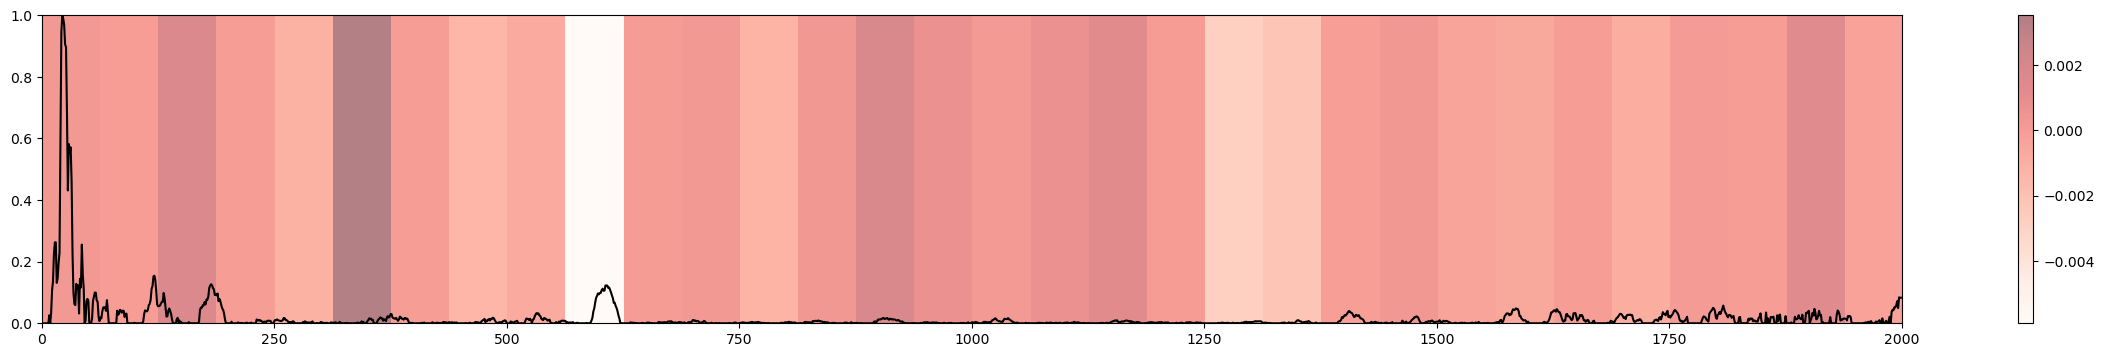

True label = [0]


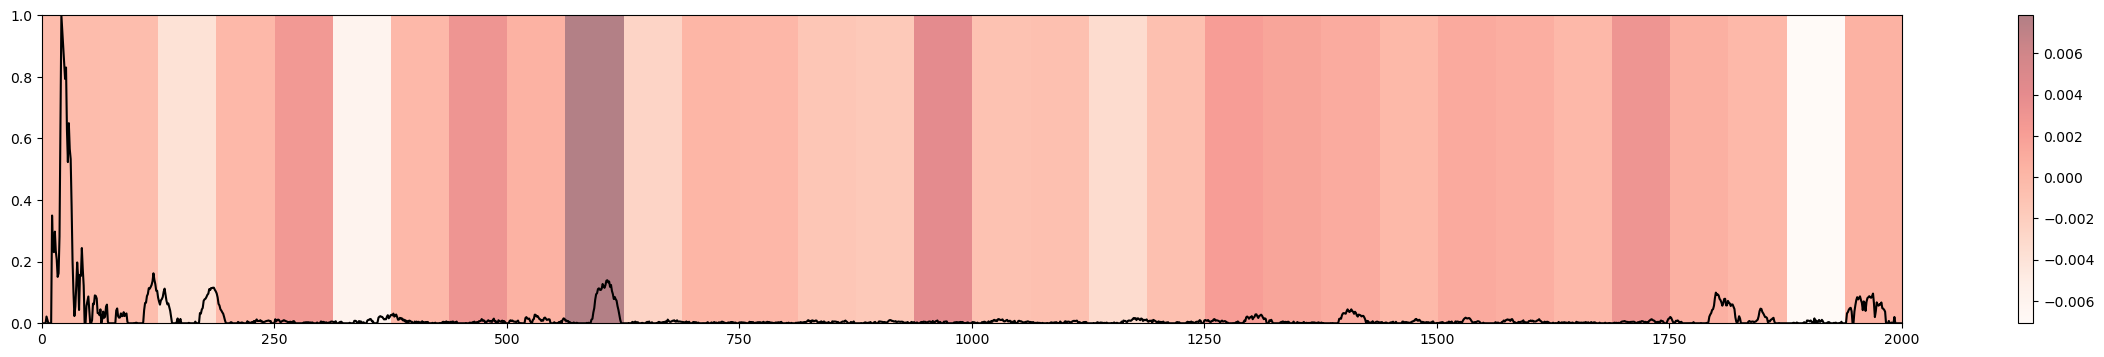

True label = [4]


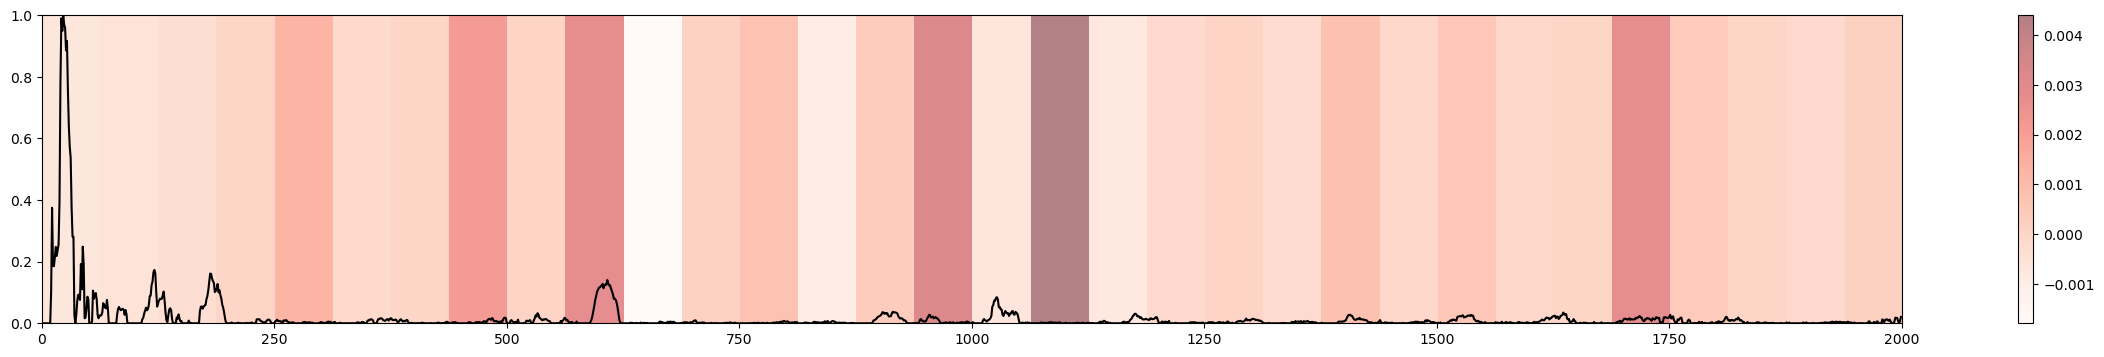

True label = [10]


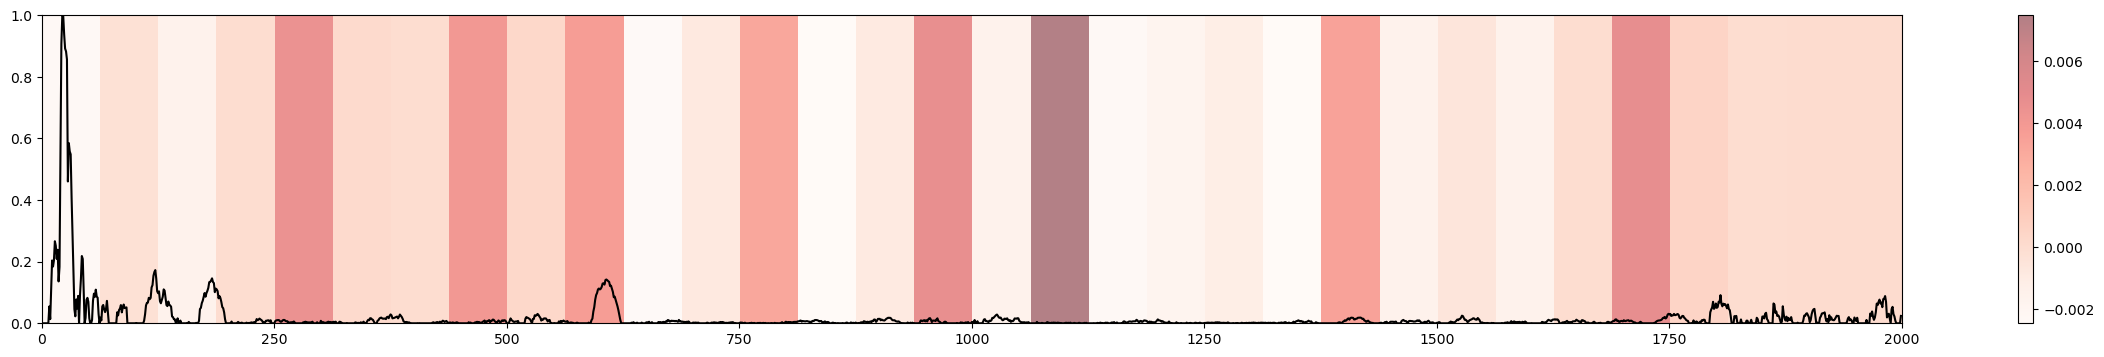

True label = [0]


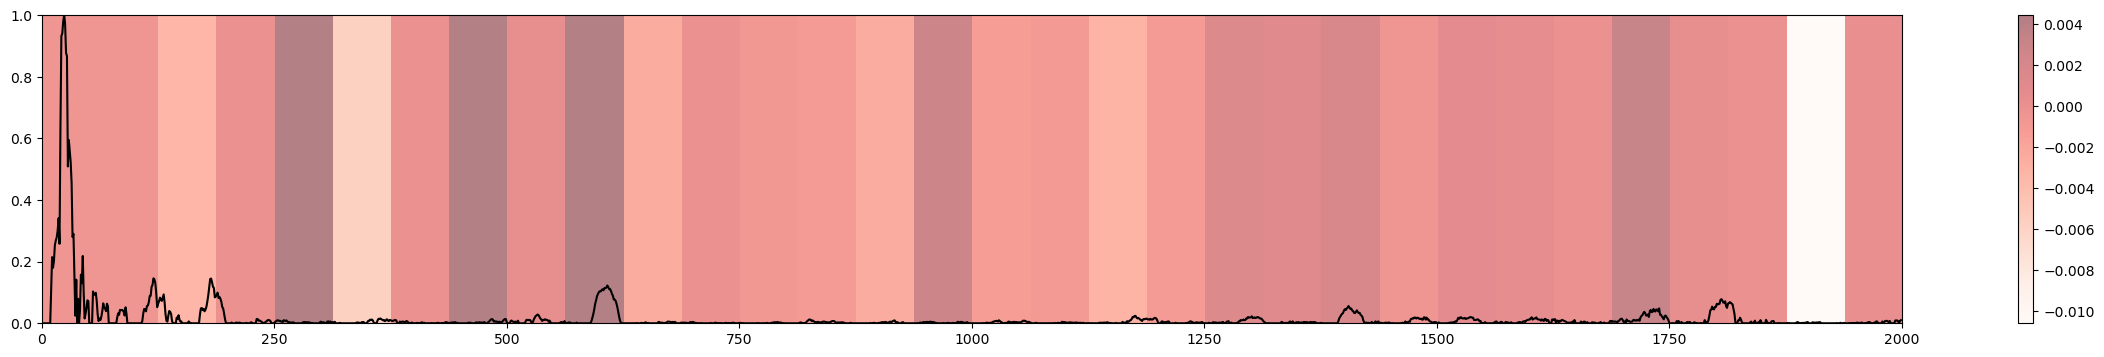

True label = [15]


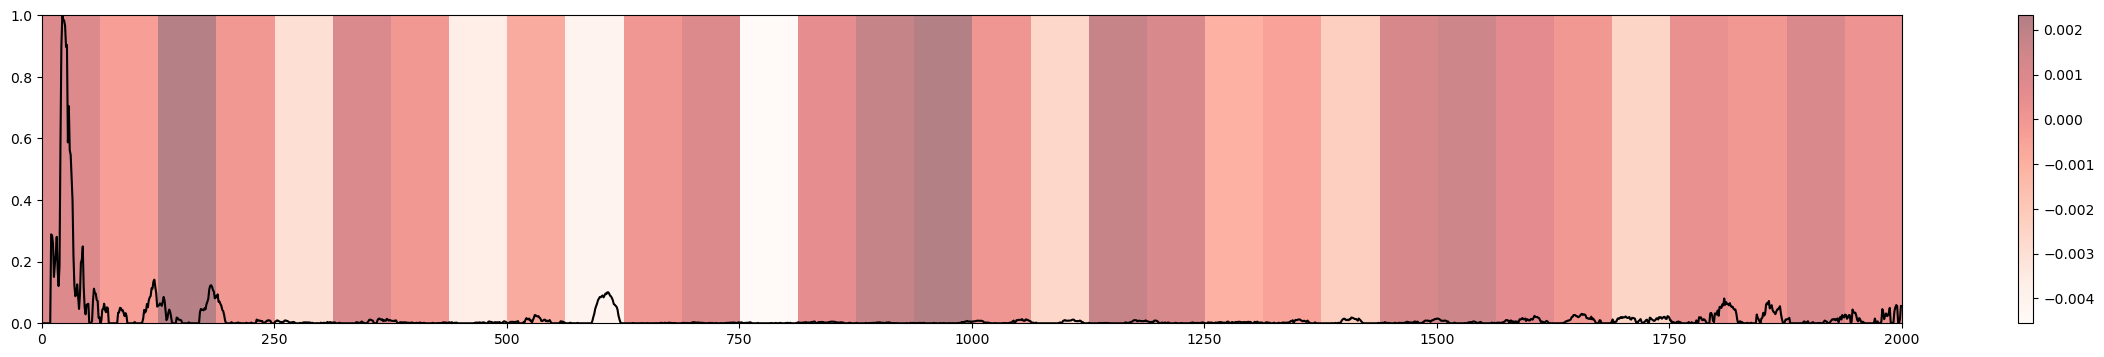

True label = [2]


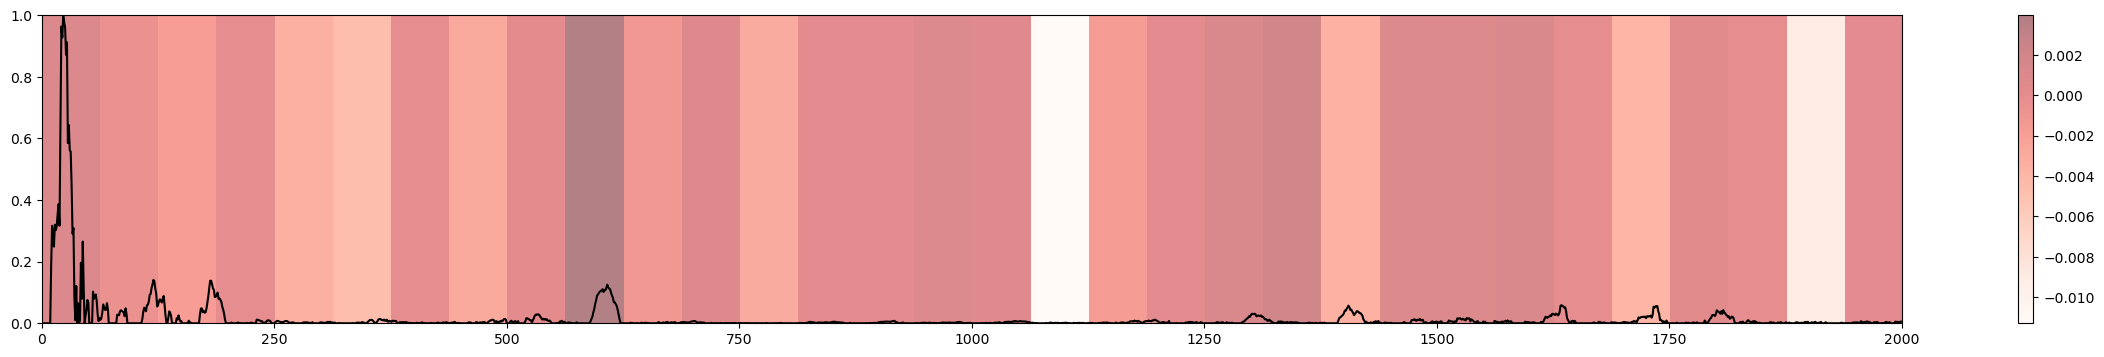

True label = [13]


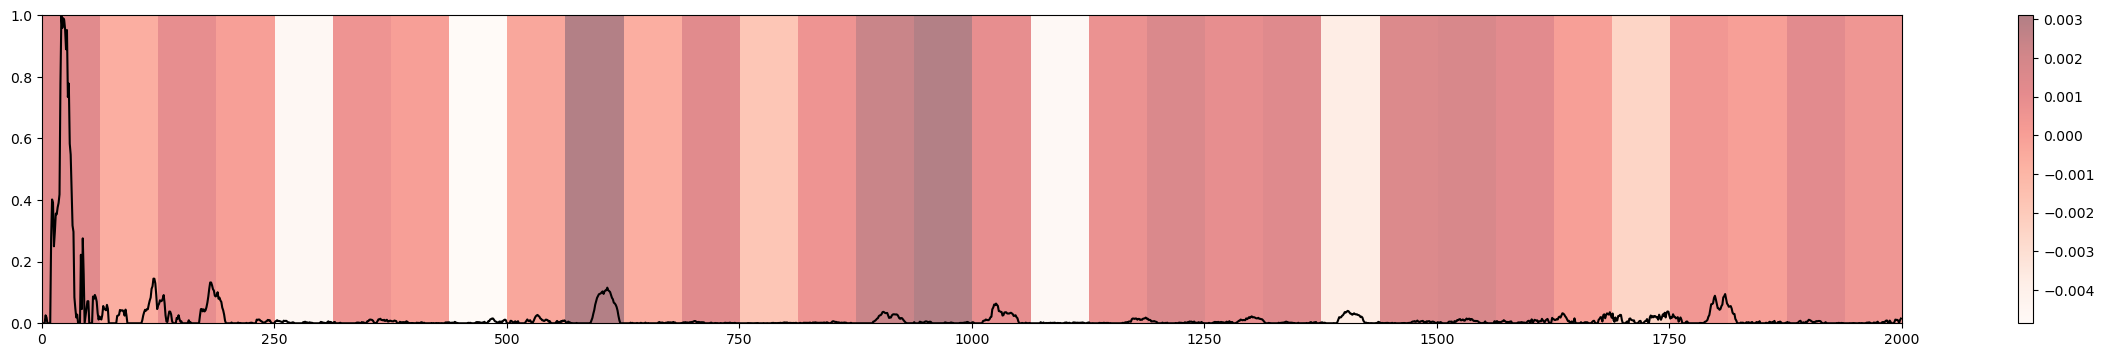

True label = [7]


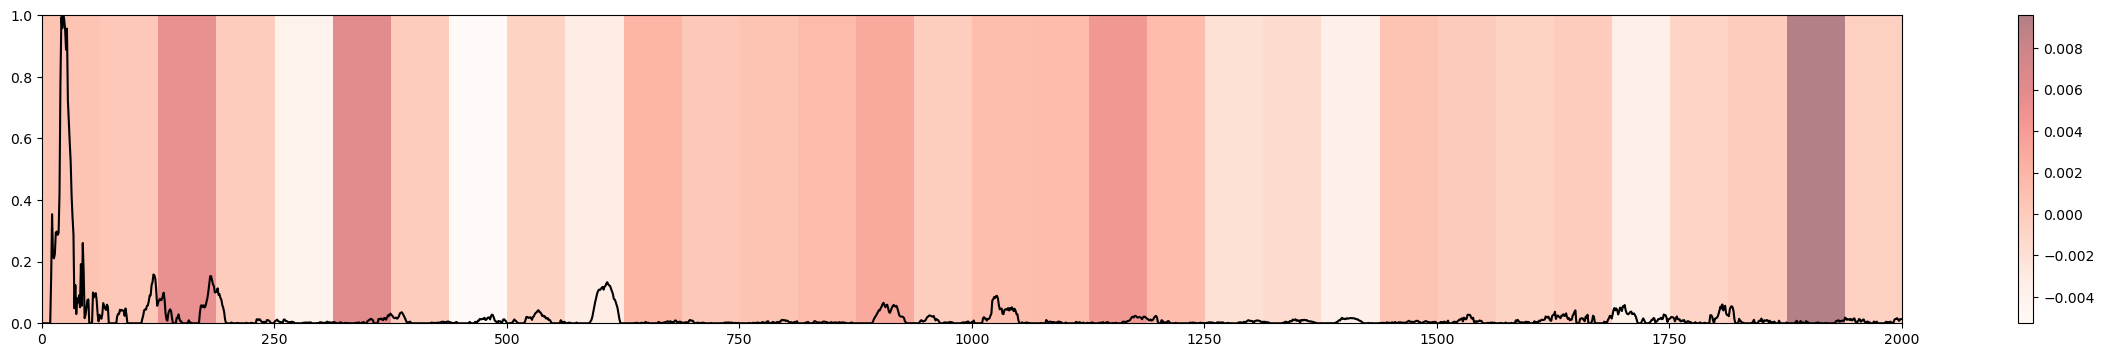

True label = [11]


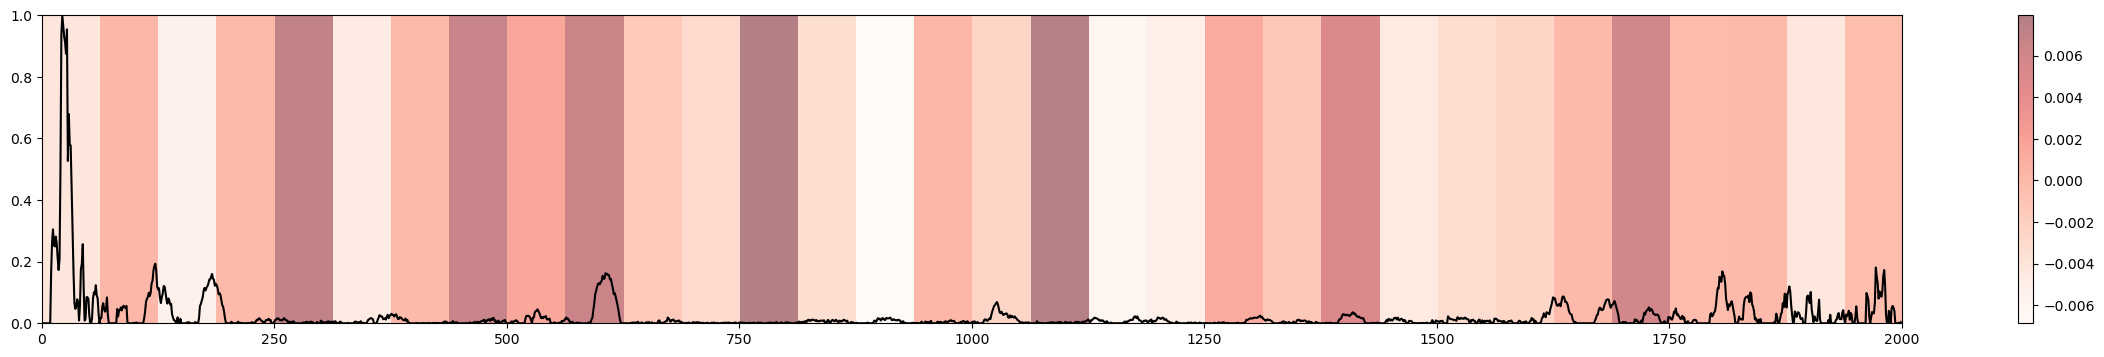

True label = [15]


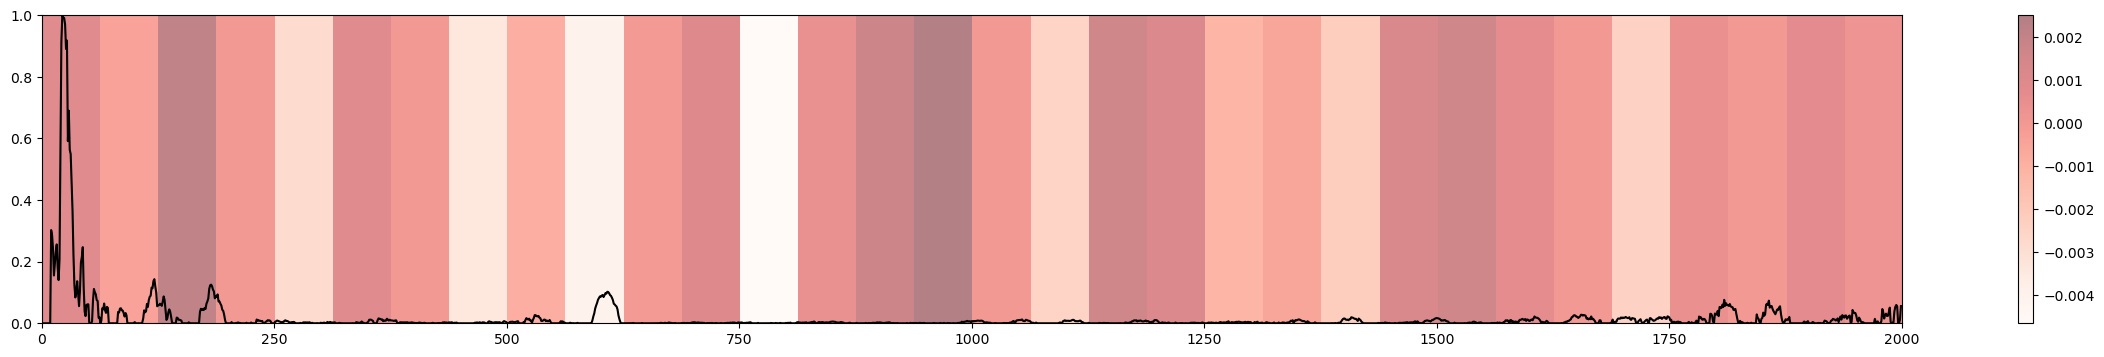

True label = [2]


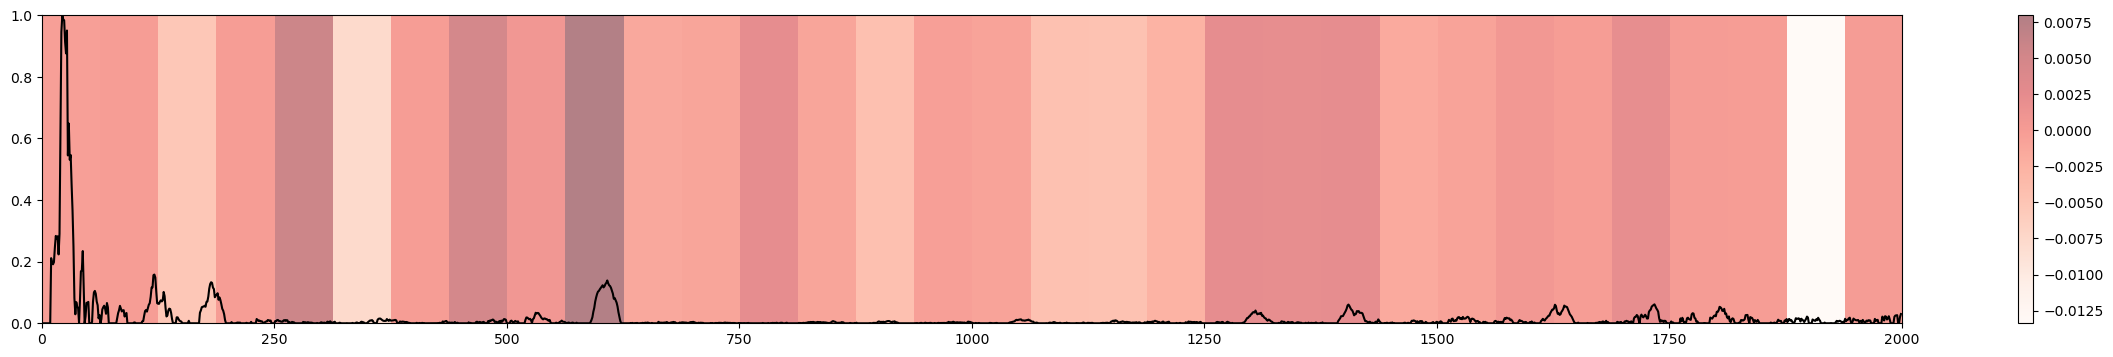

True label = [3]


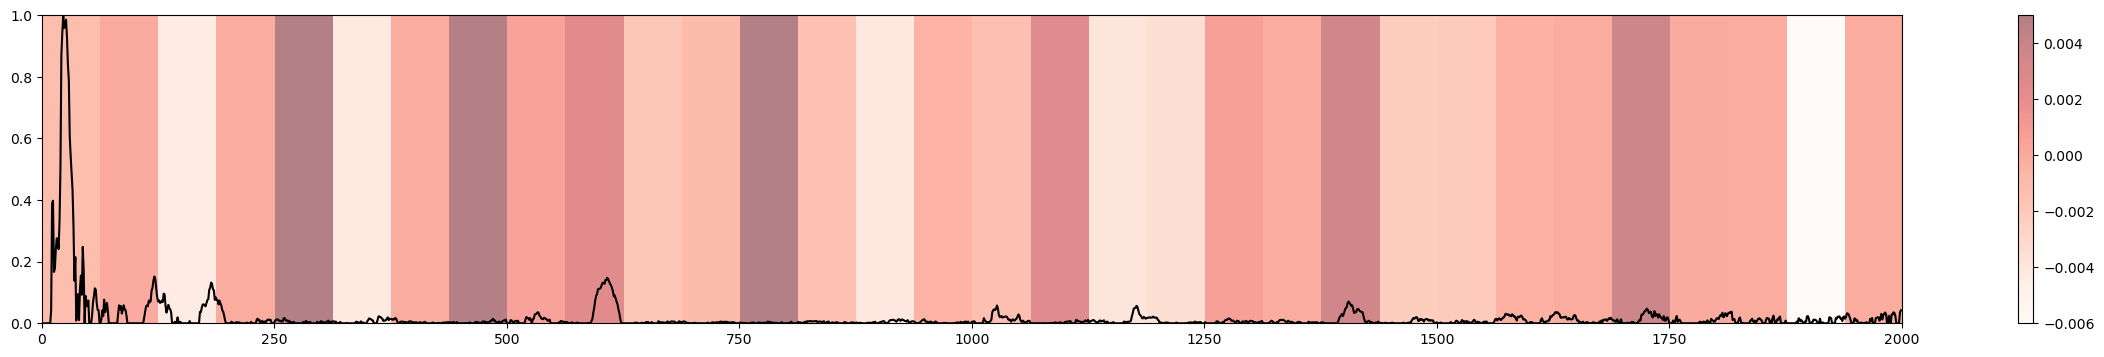

True label = [12]


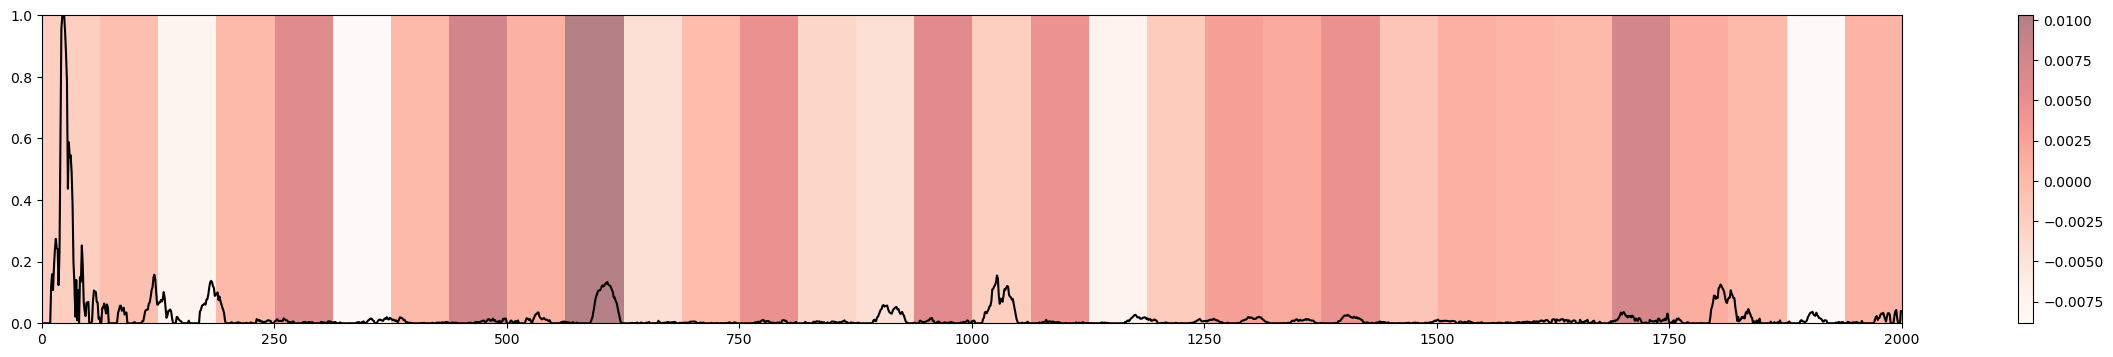

True label = [2]


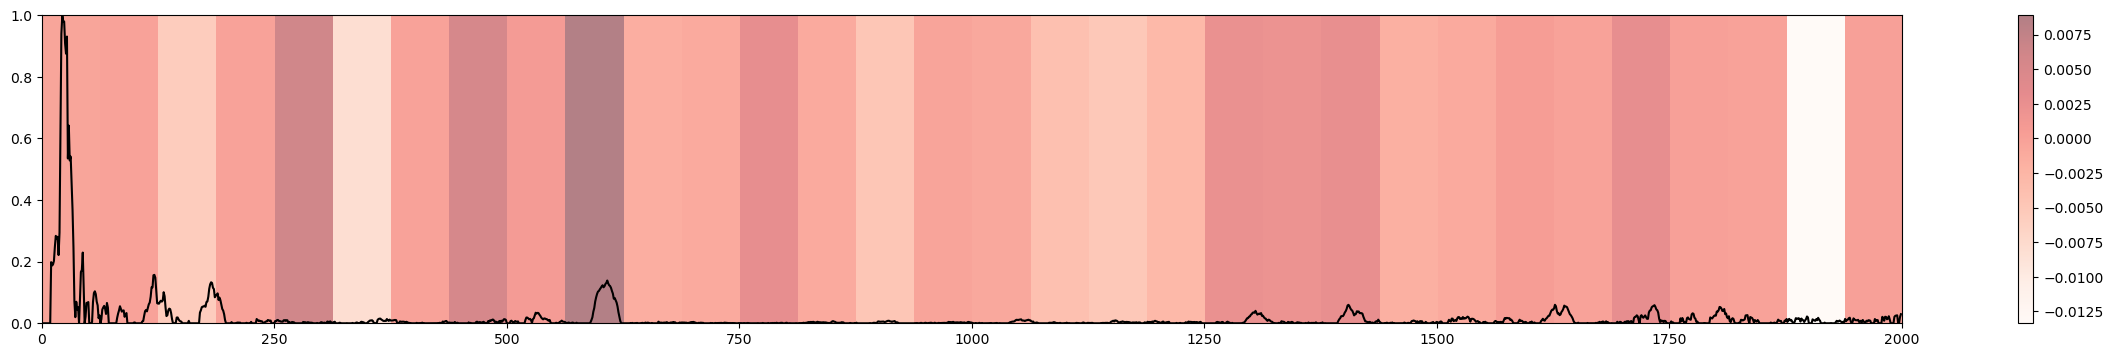

True label = [4]


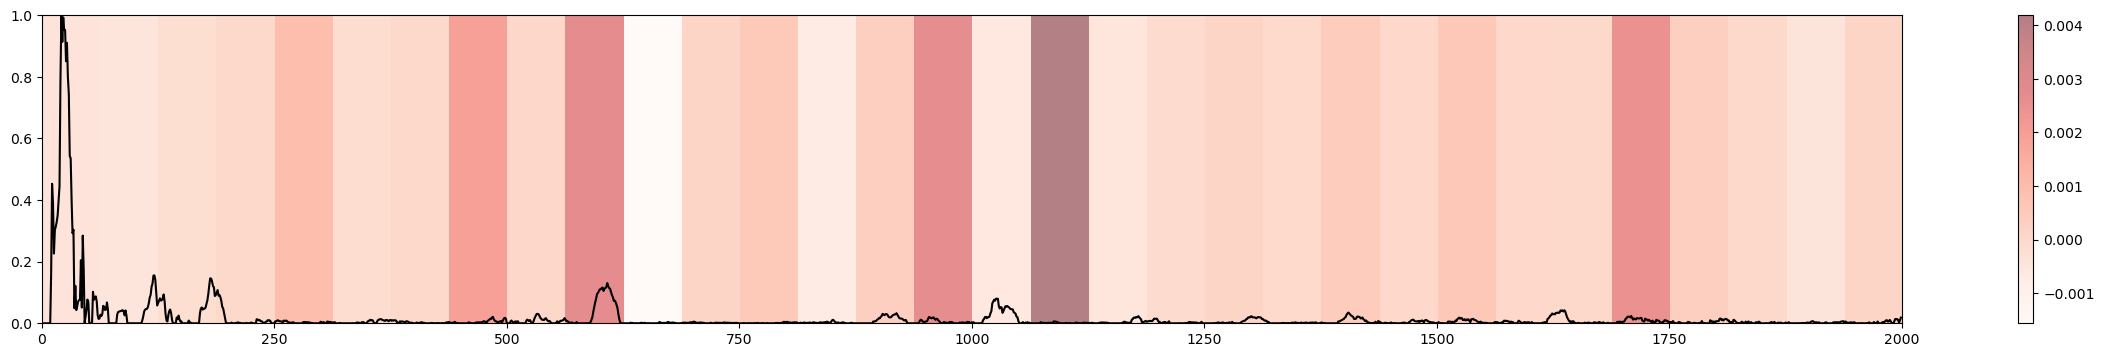

True label = [9]


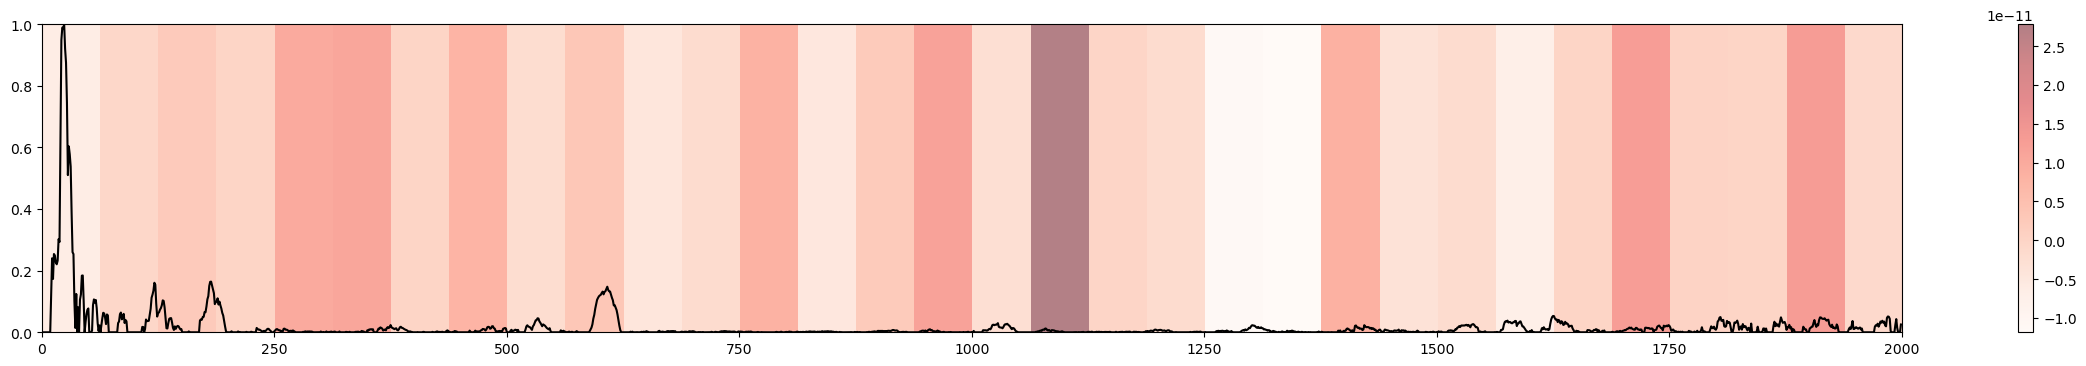

True label = [6]


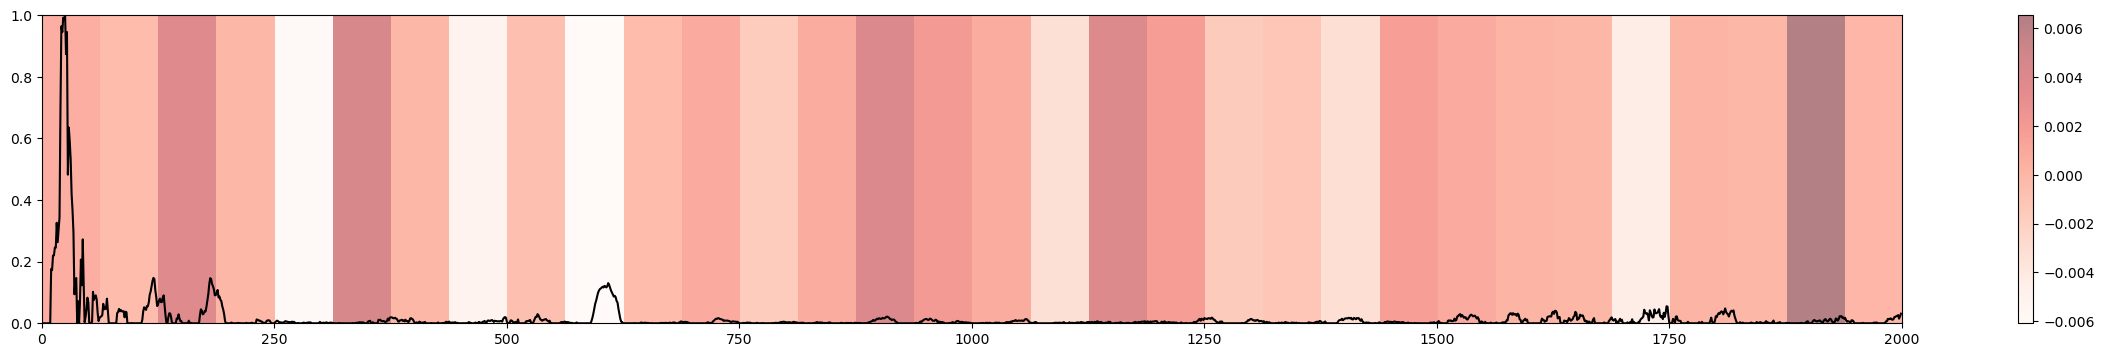

True label = [4]


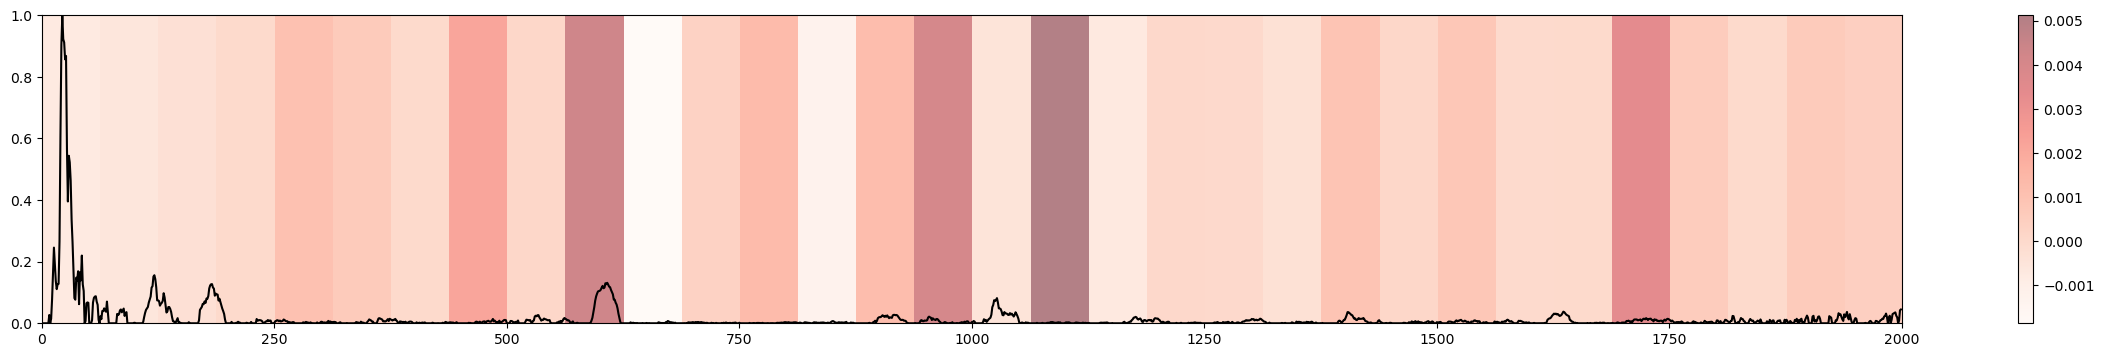

True label = [4]


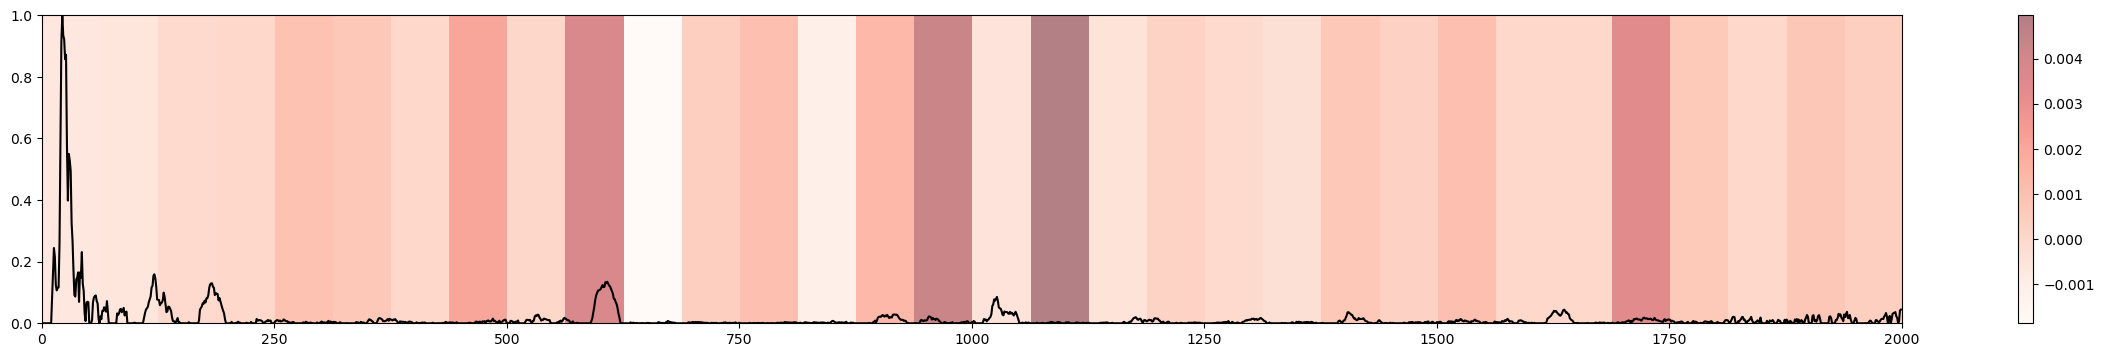

True label = [10]


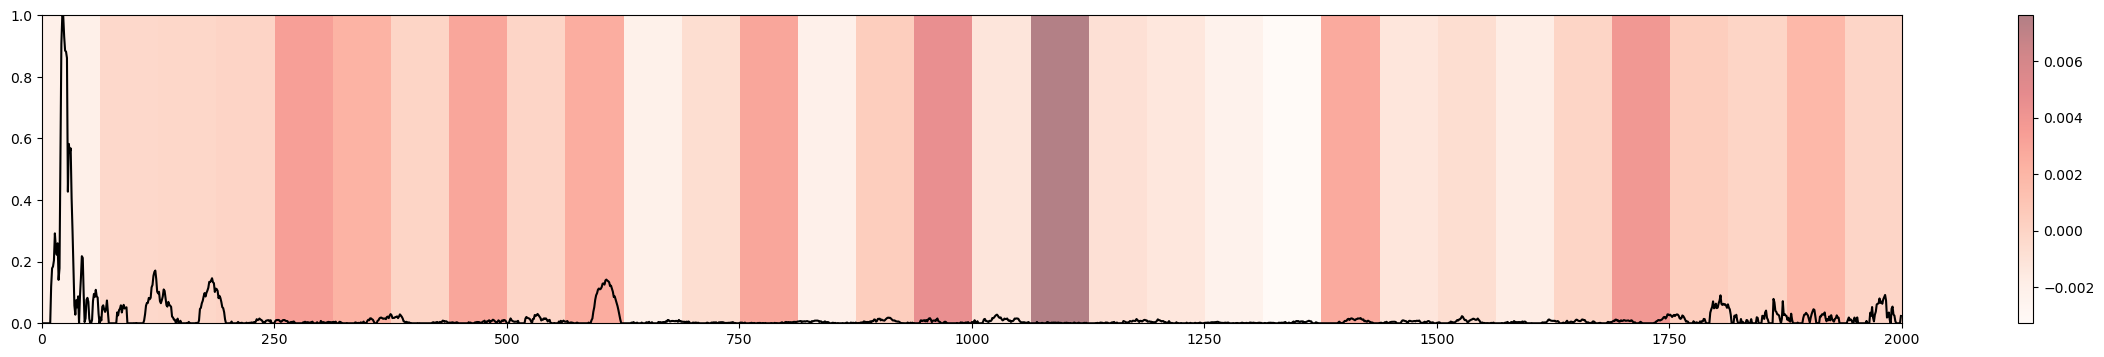

True label = [14]


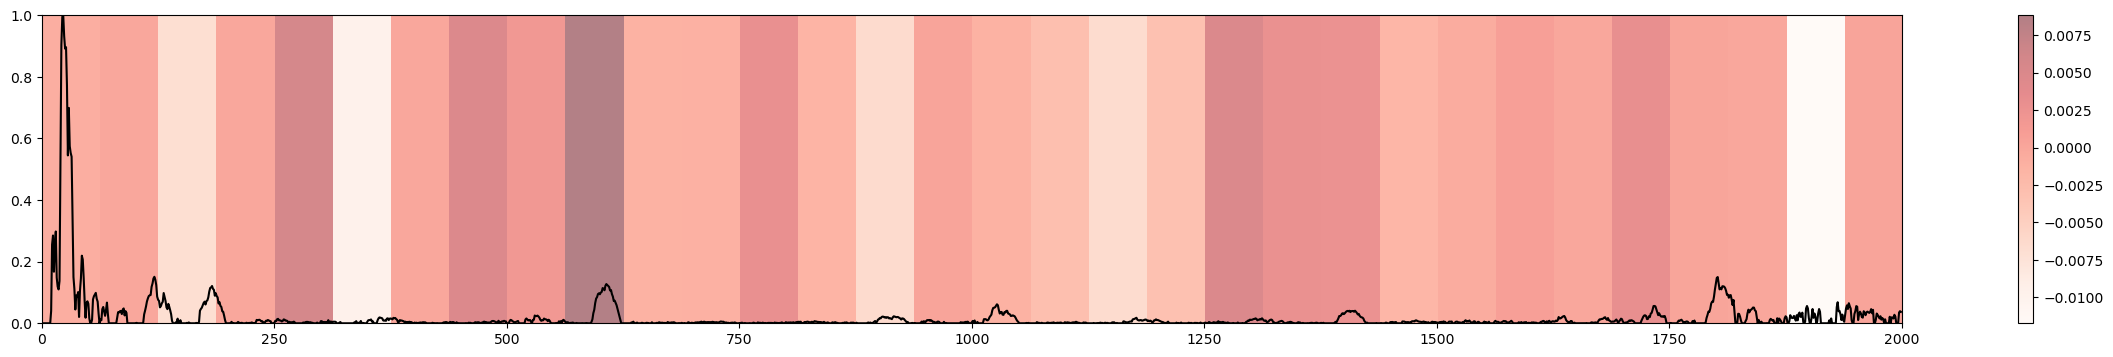

True label = [14]


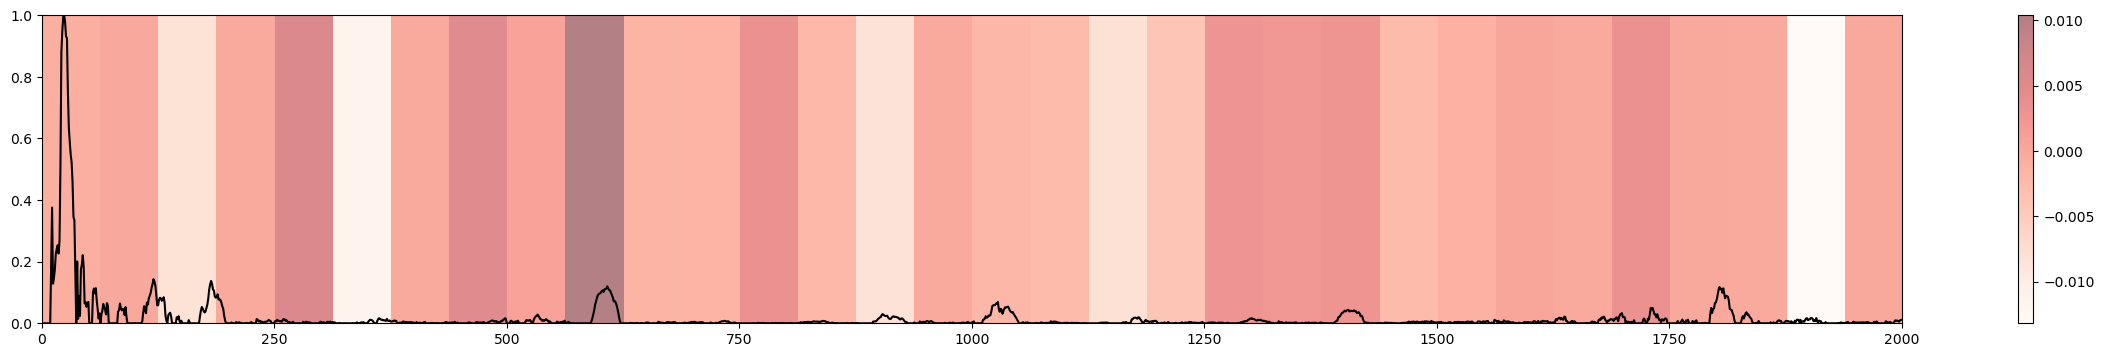

True label = [10]


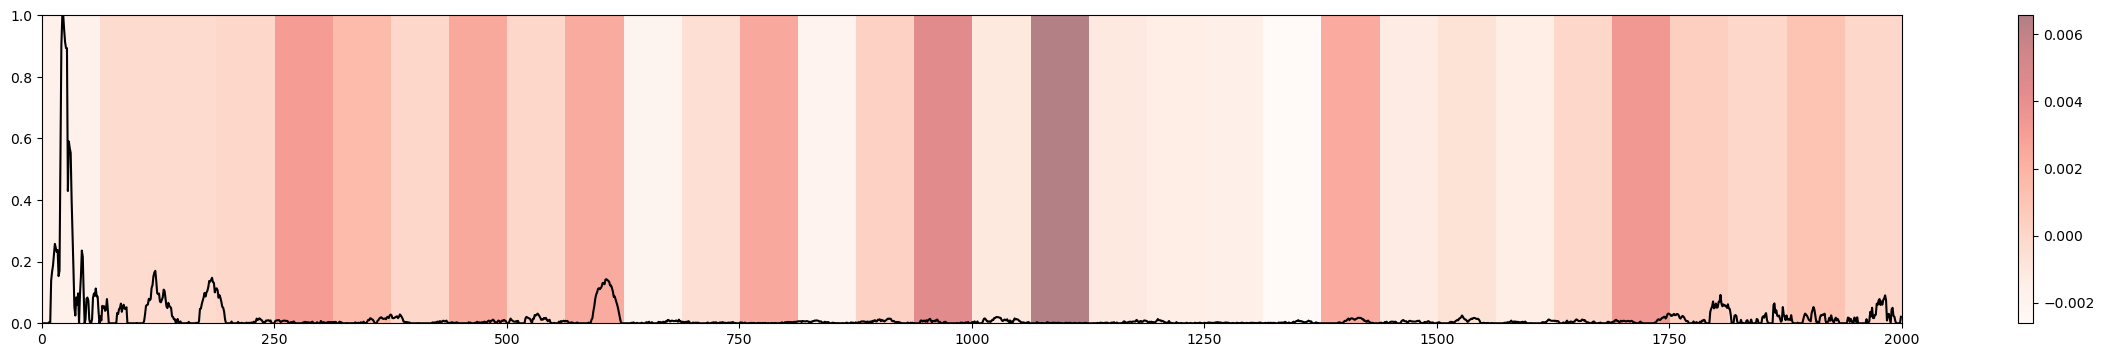

In [11]:
data=X_class_test_s.detach().cpu().numpy()
test=data[0:64]
label_test=y_tet.detach().cpu().numpy()
cnt=0
for i in test:
    data = np.expand_dims(i,0)
    heatmap = grad_cam(data)
    l=label_test[cnt]
    print(f"True label = {[int(label_test[cnt])]}")
    plt.figure(figsize=(30,4))
    plt.imshow(np.expand_dims(heatmap,axis=2),cmap='Reds', aspect="auto", interpolation='nearest',
               extent=[0,2000,i.min(),i.max()], alpha=0.5)
    plt.plot(i[0],'k')
    plt.colorbar()
    plt.show()
    cnt +=1